In [ ]:
#Pré-processamento dos microdados do ENEM 2019

#Extrair dados do estado de Alagoas
# https://medium.com/@presactlyalicia/filtering-csv-files-outside-of-a-spreadsheet-c65c5e99f37
!awk -F ';' '$5 ~ /27/ {print}' MICRODADOS_ENEM_2019.csv >> MICRODADOS_ENEM_2019_ALAGOAS.csv 

In [ ]:
import pandas as pd
import matplotlib

In [ ]:
microdadosENEM2019AL = pd.read_csv("MICRODADOS_ENEM_2019_ALAGOAS.csv", sep=";", encoding="ISO-8859-1")
# Dataset is now stored in a Pandas Dataframe

In [ ]:
microdadosENEM2019AL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91707 entries, 0 to 91706
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 95.2+ MB


In [ ]:
microdadosENEM2019AL.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91707 entries, 0 to 91706
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 297.3 MB


In [ ]:
microdadosENEM2019AL.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001339053    2019                  2709103  ...    A     B    B
1  190001339054    2019                  2704708  ...    A     A    B
2  190001339055    2019                  2704302  ...    A     A    A
3  190001339056    2019                  2708105  ...    A     B    B
4  190001339057    2019                  2709400  ...    A     A    A

[5 rows x 136 columns]

In [ ]:
microdadosENEM2019AL

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0      190001339053    2019                  2709103  ...    A     B    B
1      190001339054    2019                  2704708  ...    A     A    B
2      190001339055    2019                  2704302  ...    A     A    A
3      190001339056    2019                  2708105  ...    A     B    B
4      190001339057    2019                  2709400  ...    A     A    A
...             ...     ...                      ...  ...  ...   ...  ...
91702  190005604897    2019                  2704302  ...    A     A    B
91703  190005599636    2019                  2704302  ...    A     B    A
91704  190005604898    2019                  2700300  ...    A     A    A
91705  190005604899    2019                  2704302  ...    A     A    B
91706  190005604900    2019                  2704708  ...    A     A    B

[91707 rows x 136 columns]

In [ ]:
microdadosENEM2019AL.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
microdadosENEM2019AL['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_index(0)

Anadia                     375
Arapiraca                 9738
Atalaia                    781
Barra de Santo Antônio     261
Barra de São Miguel        168
                          ... 
Teotônio Vilela           1553
Traipu                     518
União dos Palmares        1846
Viçosa                     731
Água Branca                468
Name: NO_MUNICIPIO_RESIDENCIA, Length: 102, dtype: int64

In [ ]:
microdadosENEM2019AL['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_values(ascending=False).head(10)

Maceió                   34635
Arapiraca                 9738
Rio Largo                 2504
Palmeira dos Índios       2300
São Miguel dos Campos     1883
União dos Palmares        1846
Delmiro Gouveia           1728
Penedo                    1677
Teotônio Vilela           1553
Santana do Ipanema        1221
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

In [ ]:
microdadosENEM2019AL.groupby(['TP_ESCOLA'], as_index = False)['NU_INSCRICAO'].count()

TP_ESCOLA  NU_INSCRICAO
0          1         69418
1          2         18143
2          3          4146

In [ ]:
microdadosENEM2019AL.query('IN_TREINEIRO == 1').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_INSCRICAO'].count()

CO_MUNICIPIO_RESIDENCIA  NU_INSCRICAO
0                    2700102            41
1                    2700201            19
2                    2700300           975
3                    2700409            48
4                    2700508            13
..                       ...           ...
97                   2709103            45
98                   2709152            77
99                   2709202            43
100                  2709301           146
101                  2709400            67

[102 rows x 2 columns]

In [ ]:
microdadosENEM2019AL.query('IN_TREINEIRO == 1')['NU_INSCRICAO'].count()

8862

In [ ]:
atendimento_especializado = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
                              'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
                              'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
                              'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
                              'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

In [ ]:
microdadosENEM2019AL.groupby(['IN_BAIXA_VISAO'], as_index = False)['IN_BAIXA_VISAO'].sum()

IN_BAIXA_VISAO
0               0
1             118

In [ ]:
microdadosENEM2019AL.query('IN_BAIXA_VISAO == 1')['IN_BAIXA_VISAO'].count()

118

In [ ]:
quantEspecial = []

for x in atendimento_especializado:
    y = microdadosENEM2019AL.query(x + ' == 1')[x].count()
    quantEspecial.append([x,y])    

dfQuantEspecial = pd.DataFrame(quantEspecial, columns=["AtendEspecial", "TOTAL"])

In [ ]:
dfQuantEspecial.sort_values(by=['TOTAL'],ascending=False)

AtendEspecial  TOTAL
5     IN_DEFICIENCIA_FISICA    135
0            IN_BAIXA_VISAO    118
7        IN_DEFICIT_ATENCAO     98
12             IN_OUTRA_DEF     55
3   IN_DEFICIENCIA_AUDITIVA     33
6     IN_DEFICIENCIA_MENTAL     30
2                 IN_SURDEZ     20
11       IN_VISAO_MONOCULAR     18
8               IN_DISLEXIA     17
10               IN_AUTISMO     17
1               IN_CEGUEIRA      5
9            IN_DISCALCULIA      3
4         IN_SURDO_CEGUEIRA      0

In [ ]:
dfQuantEspecial['TOTAL'].sum()

549

In [ ]:
atendimento_especifico = ['IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR']

In [ ]:
quantEspecifico = []

for x in atendimento_especifico:
    y = microdadosENEM2019AL.query(x + ' == 1')[x].count()
    quantEspecifico.append([x,y])    

dfQuantEspecifico = pd.DataFrame(quantEspecifico, columns=["AtendEspecifico", "TOTAL"])

In [ ]:
dfQuantEspecifico.sort_values(by=['TOTAL'],ascending=False)

AtendEspecifico  TOTAL
1                  IN_LACTANTE     72
0                  IN_GESTANTE     31
2                     IN_IDOSO      3
3  IN_ESTUDA_CLASSE_HOSPITALAR      0

In [ ]:
dfQuantEspecifico['TOTAL'].sum()

106

In [ ]:
recurso_especial_especifico = ['IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS','IN_TEMPO_ADICIONAL', 
                               'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 
                               'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                               'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 
                               'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL']

In [ ]:
quantRecurso = []

for x in recurso_especial_especifico:
    y = microdadosENEM2019AL.query(x + ' == 1')[x].count()
    quantRecurso.append([x,y])    

dfQuantRecurso = pd.DataFrame(quantRecurso, columns=["Recurso", "TOTAL"])

In [ ]:
dfQuantRecurso.sort_values(by=['TOTAL'],ascending=False)

Recurso  TOTAL
7         IN_TEMPO_ADICIONAL    171
4                  IN_ACESSO    121
5             IN_TRANSCRICAO    101
3                   IN_LEDOR     99
2             IN_AMPLIADA_18     70
11            IN_APOIO_PERNA     48
9      IN_MESA_CADEIRA_RODAS     27
10  IN_MESA_CADEIRA_SEPARADA     23
1             IN_AMPLIADA_24     14
6                  IN_LIBRAS      8
8          IN_LEITURA_LABIAL      7
28          IN_SALA_ESPECIAL      7
26           IN_MEDICAMENTOS      6
21        IN_MEDIDOR_GLICOSE      5
32            IN_NOME_SOCIAL      4
27        IN_SALA_INDIVIDUAL      2
29      IN_SALA_ACOMPANHANTE      2
22         IN_MAQUINA_BRAILE      1
0                 IN_BRAILLE      1
18       IN_MOBILIARIO_OBESO      1
16     IN_CADEIRA_ACOLCHOADA      1
19         IN_LAMINA_OVERLAY      0
20     IN_PROTETOR_AURICULAR      0
17          IN_PROVA_DEITADO      0
23                IN_SOROBAN      0
24            IN_MARCA_PASSO      0
25                  IN_SONDA      0
15        IN_CADEIRA_CANHOTO      0
14       IN_CADEIRA_ESPECIAL      0
13             IN_COMPUTADOR      0
12        IN_GUIA_INTERPRETE      0
30  IN_MOBILIARIO_ESPECIFICO      0
31    IN_MATERIAL_ESPECIFICO      0

In [ ]:
dfQuantRecurso['TOTAL'].sum()

719

In [ ]:
microdadosENEM2019AL['NO_MUNICIPIO_RESIDENCIA'].unique()

array(['Taquarana', 'Marechal Deodoro', 'Maceió', 'Santana do Mundaú',
       'Viçosa', 'Feira Grande', 'Palmeira dos Índios', 'Arapiraca',
       'Teotônio Vilela', 'Satuba', 'Cajueiro', 'União dos Palmares',
       'Pilar', 'Delmiro Gouveia', 'Piranhas', 'Capela', 'Penedo',
       'Coruripe', 'Igaci', 'Monteirópolis', 'São Miguel dos Campos',
       'Estrela de Alagoas', 'Girau do Ponciano',
       "Olho d'Água das Flores", 'Campo Alegre', 'Campo Grande',
       'Rio Largo', 'Chã Preta', 'Junqueiro', 'Maragogi',
       'Limoeiro de Anadia', 'Traipu', 'Porto Calvo', 'Batalha', 'Belém',
       'Pão de Açúcar', 'Santana do Ipanema', 'São Luís do Quitunde',
       'Santa Luzia do Norte', 'Senador Rui Palmeira', 'São Sebastião',
       'Barra de Santo Antônio', "Olho d'Água do Casado", 'Dois Riachos',
       'Água Branca', 'Feliz Deserto', 'Ouro Branco', 'Lagoa da Canoa',
       'Porto Real do Colégio', 'Atalaia', 'Igreja Nova', 'Anadia',
       'Craíbas', 'Piaçabuçu', 'Inhapi', 'Belo Mon

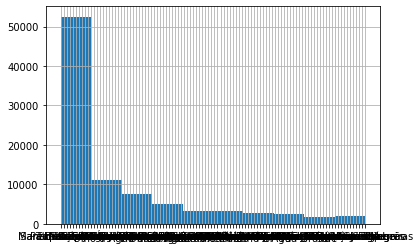

In [ ]:
microdadosENEM2019AL['NO_MUNICIPIO_RESIDENCIA'].hist()

In [ ]:
microdadosENEM2019AL['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_values(ascending=False).head(20)

Maceió                   34635
Arapiraca                 9738
Rio Largo                 2504
Palmeira dos Índios       2300
São Miguel dos Campos     1883
União dos Palmares        1846
Delmiro Gouveia           1728
Penedo                    1677
Teotônio Vilela           1553
Santana do Ipanema        1221
Girau do Ponciano         1126
Marechal Deodoro          1115
Coruripe                  1103
Campo Alegre              1002
São Sebastião              923
Pilar                      885
Junqueiro                  824
Atalaia                    781
Satuba                     747
Piranhas                   742
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

In [ ]:
microdadosENEM2019AL['NU_IDADE'].value_counts().sort_index(0)

13        2
14       54
15     1155
16     4496
17    11373
      ...  
71        1
72        1
73        1
77        1
79        1
Name: NU_IDADE, Length: 63, dtype: int64

In [ ]:
microdadosENEM2019AL['NU_IDADE'].value_counts().sort_values(ascending=False).head(20)

18    13855
17    11373
19    10907
20     8145
21     6150
22     4947
16     4496
23     4056
24     3475
25     2841
26     2326
27     1983
28     1596
29     1436
30     1363
31     1229
15     1155
32     1154
33      970
34      878
Name: NU_IDADE, dtype: int64

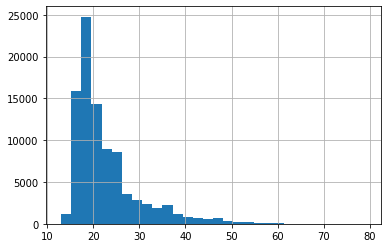

In [ ]:
#microdadosENEM2019AL['NU_IDADE'].hist()
microdadosENEM2019AL['NU_IDADE'].hist(bins=30)

In [ ]:
#microdadosENEM2019AL['IN_GESTANTE'].value_counts()
disInGestante = microdadosENEM2019AL['IN_GESTANTE'].value_counts()
percentInGestante = [100*x/disInGestante.sum() for x in disInGestante]
percentInGestante

[99.96619669163749, 0.03380330836250232]

In [ ]:
#microdadosENEM2019AL['TP_SEXO'].value_counts()
disTpSexo = microdadosENEM2019AL['TP_SEXO'].value_counts()
percentTpSexo = [100*x/disTpSexo.sum() for x in disTpSexo]
percentTpSexo

[60.25167108290534, 39.74832891709466]

In [ ]:
sexoFeminino = disTpSexo[0]

In [ ]:
nu_gestantes = disInGestante[1]

In [ ]:
sexoFeminino

55255

In [ ]:
nu_gestantes

31

In [ ]:
percentGestantes = 100*nu_gestantes/sexoFeminino

In [ ]:
percentGestantes

0.05610352004343498

In [ ]:
percentNaoGestantes = 100 - percentGestantes

In [ ]:
percentNaoGestantes

99.94389647995656

In [ ]:
# https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html
# https://github.com/ipeaGIT/geobr
# https://ipeagit.github.io/geobr/
!pip install geobr

     |████████████████████████████████| 928 kB 34.1 MB/s 
     |████████████████████████████████| 6.3 MB 28.1 MB/s 
     |████████████████████████████████| 15.4 MB 35.9 MB/s 


In [ ]:
import geobr

In [ ]:
# Available data sets
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in S

(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

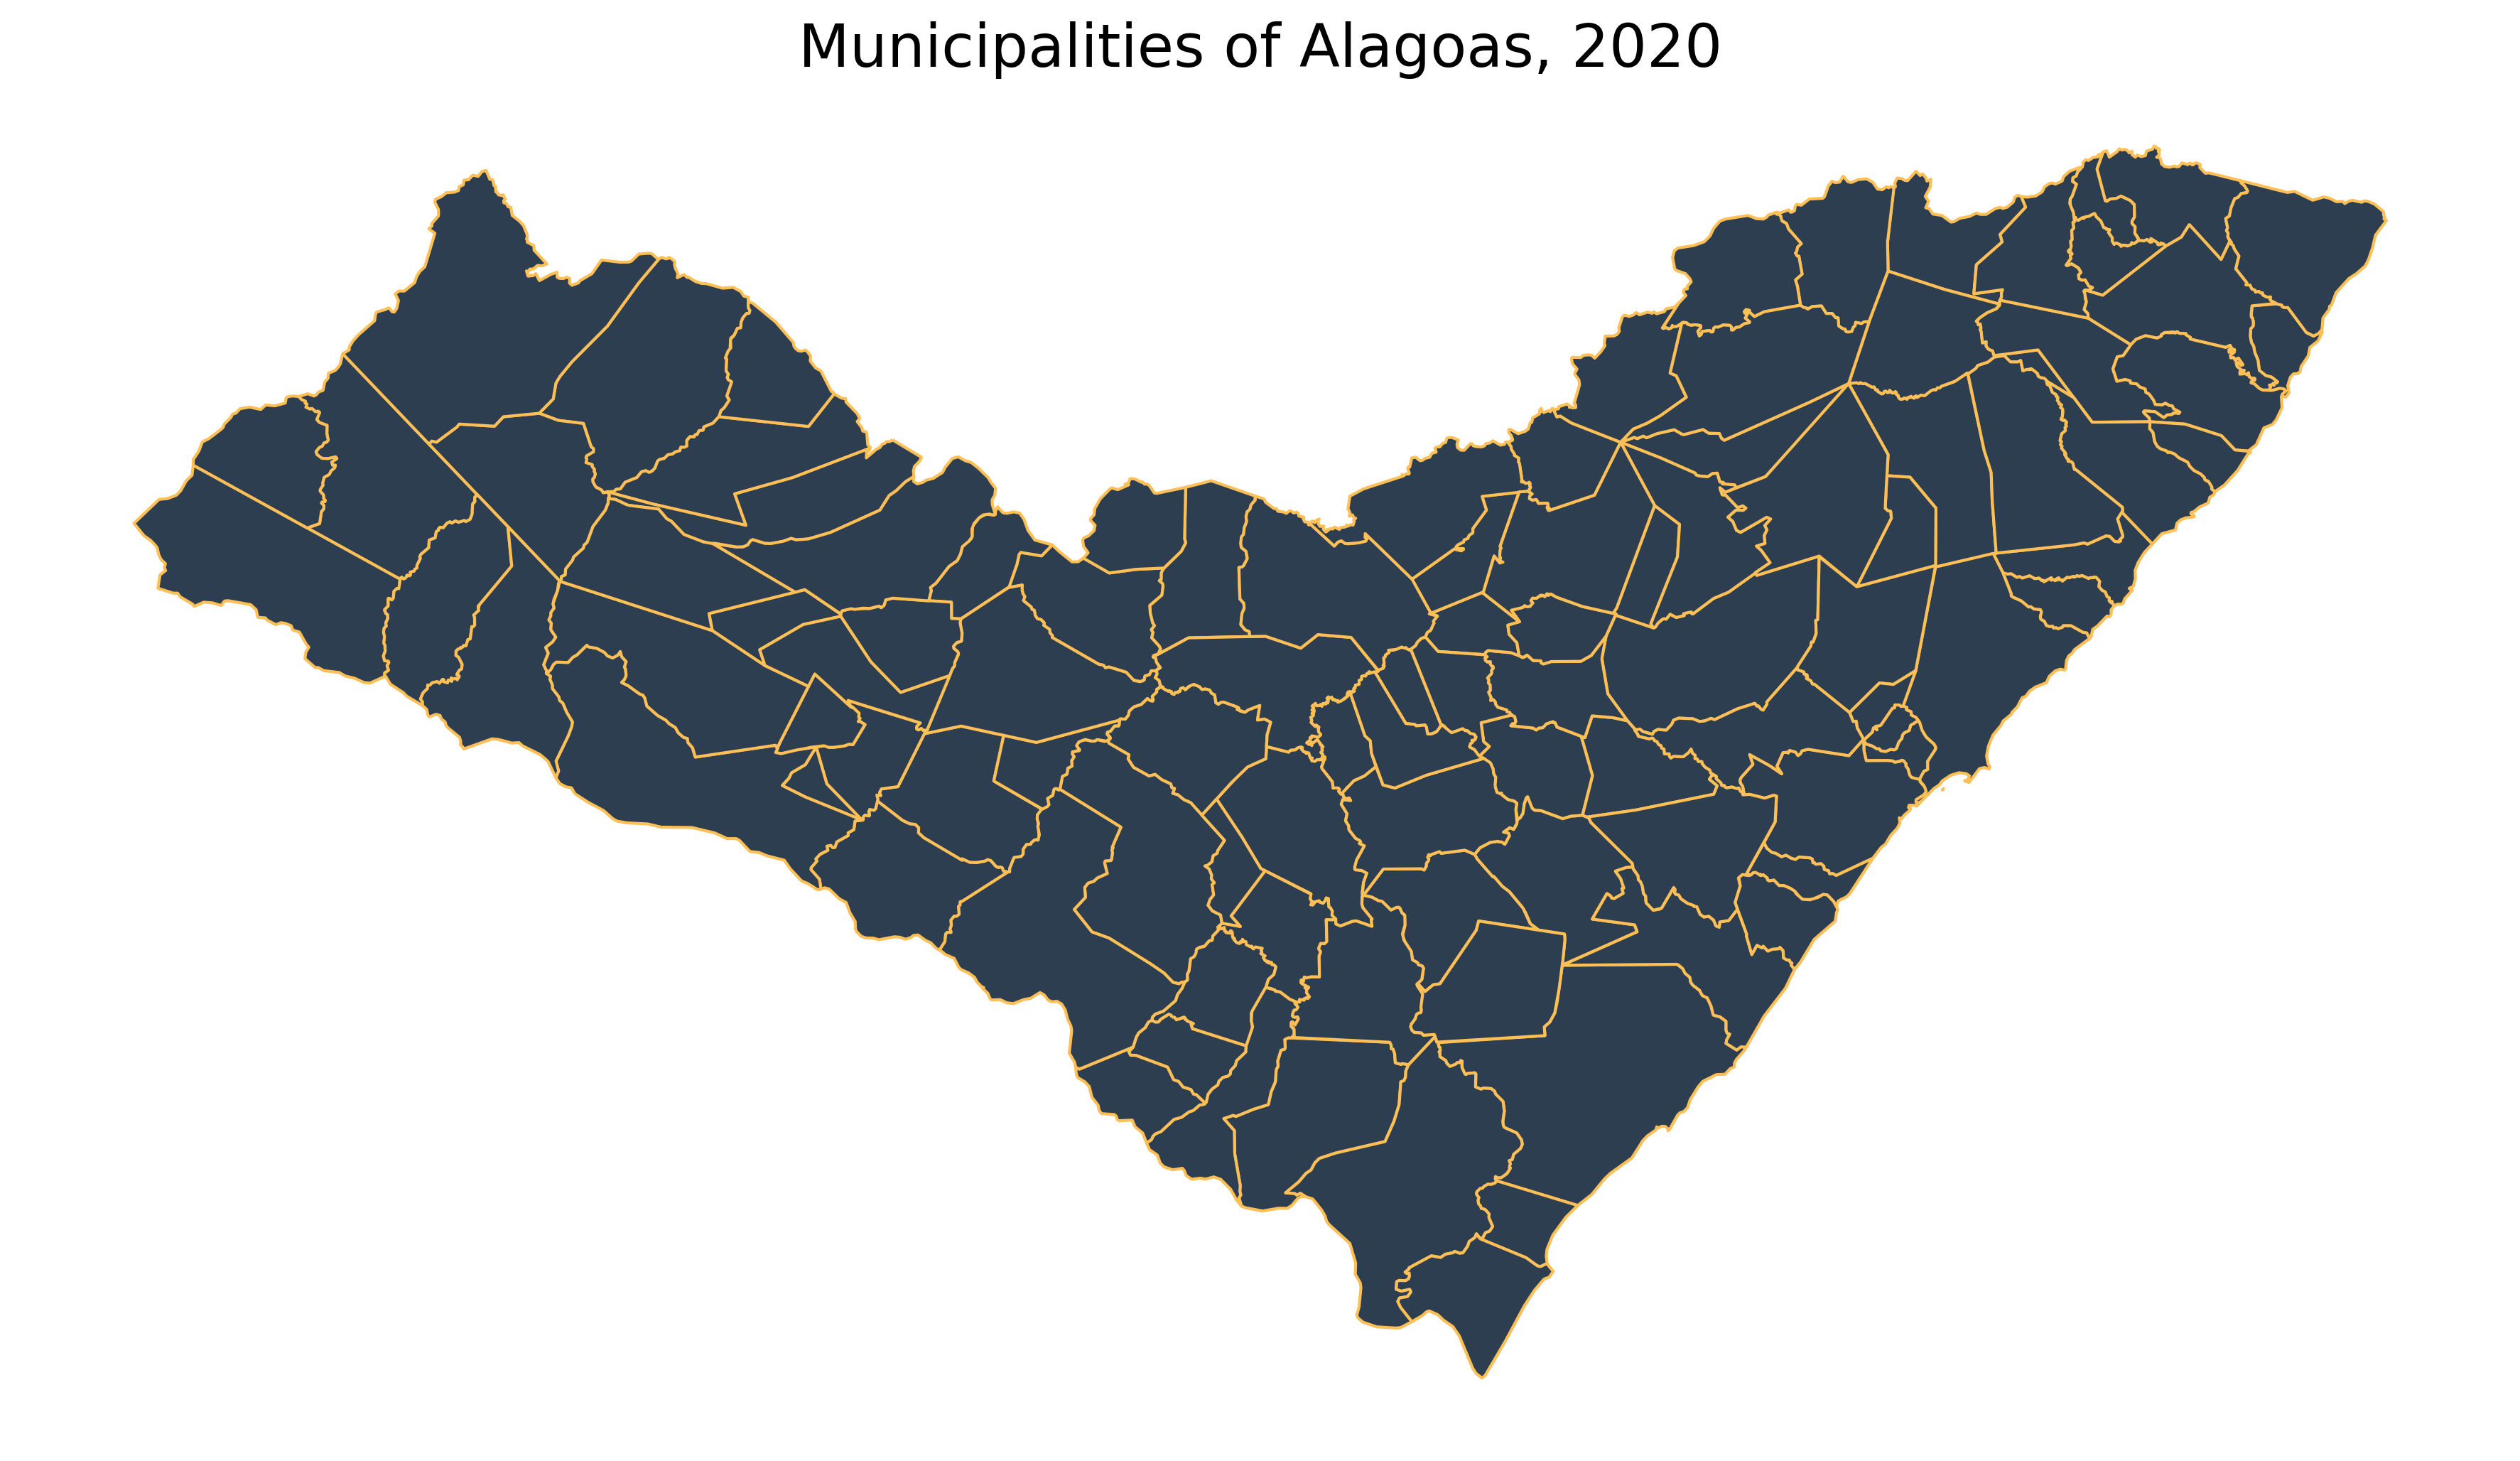

In [ ]:
# Download all municipalities of Alagoas
all_muni = geobr.read_municipality(code_muni="AL", year=2020)
# plot
fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15), dpi=300)

all_muni.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("Municipalities of Alagoas, 2020", fontsize=20)
ax.axis("off")

In [ ]:
all_muni.head()

code_muni  ...                                           geometry
0  2700102.0  ...  MULTIPOLYGON (((-37.95164 -9.09743, -37.76882 ...
1  2700201.0  ...  MULTIPOLYGON (((-36.34926 -9.59310, -36.34601 ...
2  2700300.0  ...  MULTIPOLYGON (((-36.66005 -9.64201, -36.65583 ...
3  2700409.0  ...  MULTIPOLYGON (((-35.92889 -9.37557, -35.93089 ...
4  2700508.0  ...  MULTIPOLYGON (((-35.50117 -9.32811, -35.47249 ...

[5 rows x 8 columns]

In [ ]:
all_muni.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_muni     102 non-null    float64 
 1   name_muni     102 non-null    object  
 2   code_state    102 non-null    float64 
 3   abbrev_state  102 non-null    object  
 4   name_state    102 non-null    object  
 5   code_region   102 non-null    float64 
 6   name_region   102 non-null    object  
 7   geometry      102 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 6.5+ KB


In [ ]:
# join the databases
dfInscritosMunAL = microdadosENEM2019AL.groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_INSCRICAO'].count()
dfInscritosMunAL.head()

CO_MUNICIPIO_RESIDENCIA  NU_INSCRICAO
0                  2700102           468
1                  2700201           375
2                  2700300          9738
3                  2700409           781
4                  2700508           261

In [ ]:
all_muni_al = all_muni.copy()
all_muni_al = all_muni_al.merge(dfInscritosMunAL, how="left", left_on="code_muni", right_on="CO_MUNICIPIO_RESIDENCIA")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

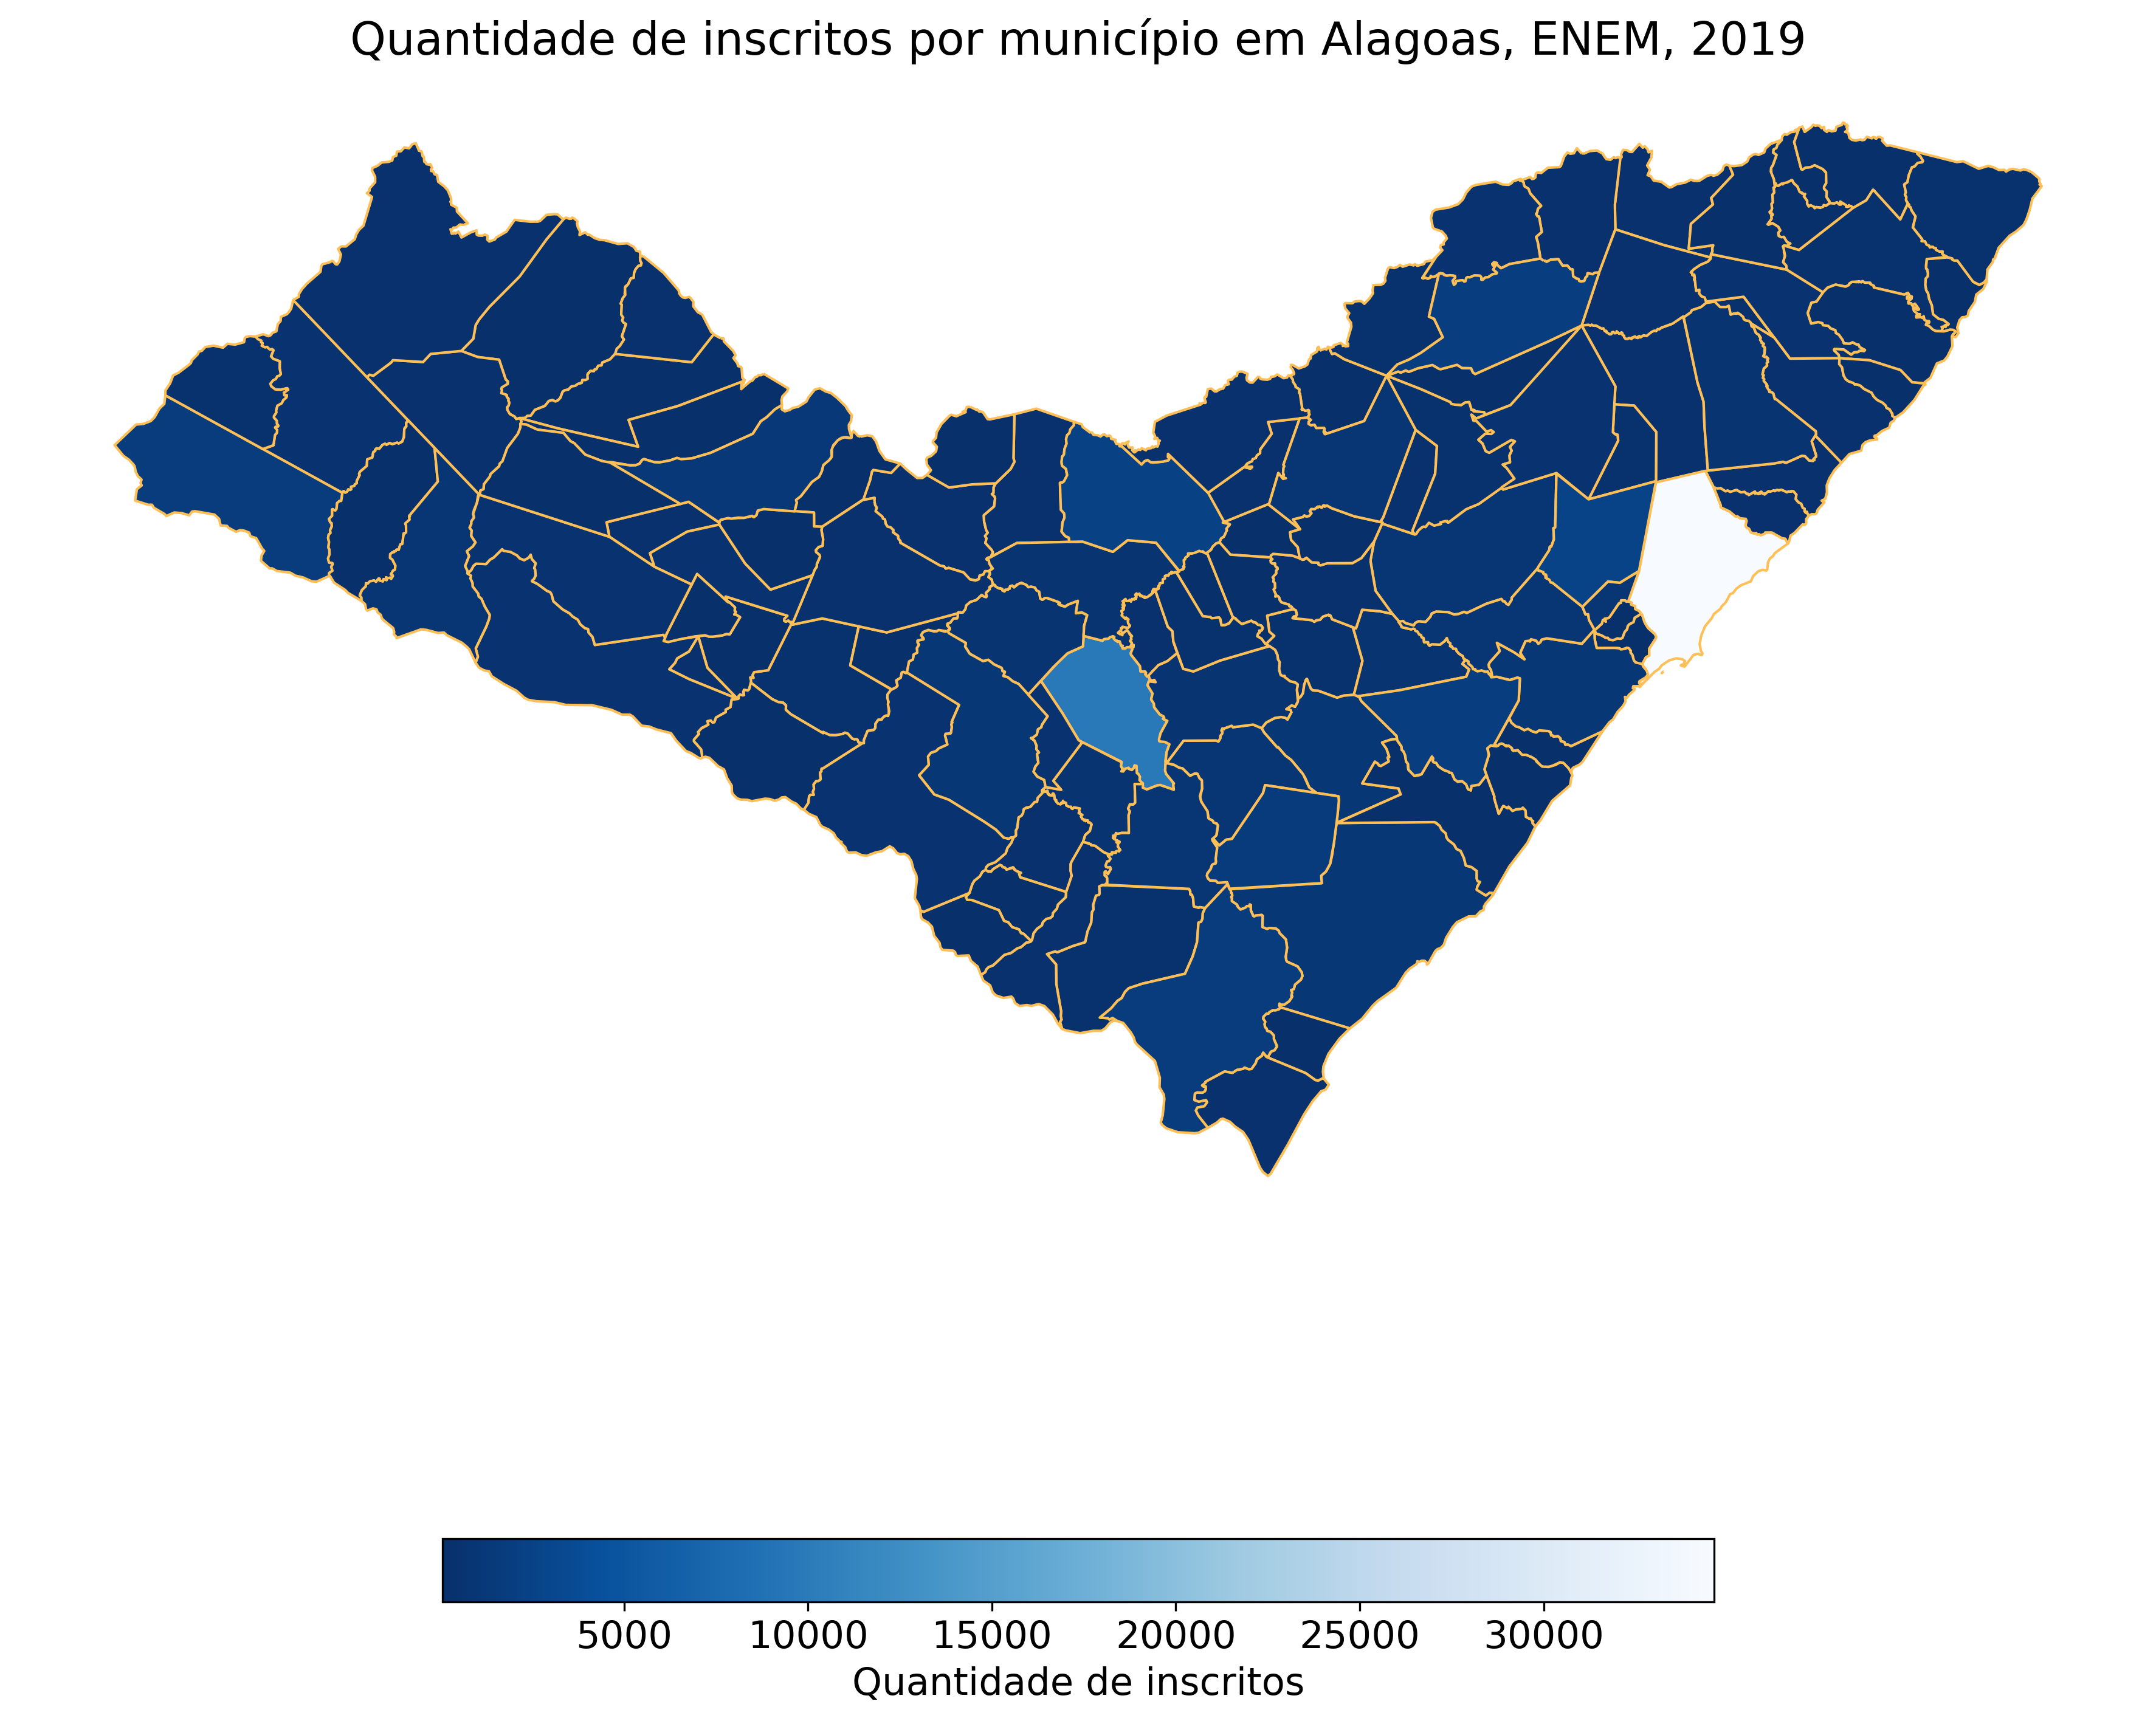

In [ ]:
matplotlib.pyplot.rcParams.update({"font.size": 15})

fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15), dpi=300)

all_muni_al.plot(
    column="NU_INSCRICAO",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Quantidade de inscritos",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="#FEBF57",
    ax=ax,
)

ax.set_title("Quantidade de inscritos por município em Alagoas, ENEM, 2019")
ax.axis("off")

In [ ]:
#microdadosENEM2019AL.isna()
#microdadosENEM2019AL.isna().sum()
microdadosENEM2019AL.isna().sum().sort_values(ascending=False).head(40)

CO_UF_ESC                  74088
NO_MUNICIPIO_ESC           74088
TP_SIT_FUNC_ESC            74088
TP_LOCALIZACAO_ESC         74088
TP_DEPENDENCIA_ADM_ESC     74088
CO_ESCOLA                  74088
SG_UF_ESC                  74088
CO_MUNICIPIO_ESC           74088
TP_ENSINO                  35221
NU_NOTA_CN                 22843
CO_PROVA_MT                22843
NU_NOTA_MT                 22843
TX_RESPOSTAS_CN            22843
TX_GABARITO_MT             22843
TX_RESPOSTAS_MT            22843
TX_GABARITO_CN             22843
CO_PROVA_CN                22843
TX_GABARITO_LC             19590
TP_STATUS_REDACAO          19590
TX_RESPOSTAS_CH            19590
TX_RESPOSTAS_LC            19590
TX_GABARITO_CH             19590
NU_NOTA_COMP2              19590
NU_NOTA_LC                 19590
NU_NOTA_CH                 19590
CO_PROVA_LC                19590
CO_PROVA_CH                19590
NU_NOTA_COMP1              19590
NU_NOTA_COMP3              19590
NU_NOTA_COMP5              19590
NU_NOTA_RE

In [ ]:
#microdadosENEM2019AL.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], inplace=True)
microdadosENEM2019ALClean = microdadosENEM2019AL.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [ ]:
microdadosENEM2019ALClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68750 entries, 0 to 91703
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 71.9+ MB


In [ ]:
microdadosENEM2019ALClean.isna().sum().sort_values(ascending=False).head(15)

NO_MUNICIPIO_ESC           53777
CO_UF_ESC                  53777
CO_MUNICIPIO_ESC           53777
CO_ESCOLA                  53777
SG_UF_ESC                  53777
TP_DEPENDENCIA_ADM_ESC     53777
TP_LOCALIZACAO_ESC         53777
TP_SIT_FUNC_ESC            53777
TP_ENSINO                  26454
SG_UF_NASCIMENTO            2410
CO_UF_NASCIMENTO            2410
NO_MUNICIPIO_NASCIMENTO     2410
CO_MUNICIPIO_NASCIMENTO     2410
IN_TRANSCRICAO                 0
IN_ACESSO                      0
dtype: int64

In [ ]:
colunas_selecionadas = ['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
       'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [ ]:
microdadosENEM2019ALClean[colunas_selecionadas]

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0      190001339053    2019                  2709103  ...    A     B    B
1      190001339054    2019                  2704708  ...    A     A    B
2      190001339055    2019                  2704302  ...    A     A    A
3      190001339056    2019                  2708105  ...    A     B    B
4      190001339057    2019                  2709400  ...    A     A    A
...             ...     ...                      ...  ...  ...   ...  ...
91695  190005611892    2019                  2707701  ...    A     A    B
91696  190005611893    2019                  2700300  ...    A     A    A
91700  190005604895    2019                  2704302  ...    B     B    B
91702  190005604897    2019                  2704302  ...    A     A    B
91703  190005599636    2019                  2704302  ...    A     B    A

[68750 rows x 123 columns]

In [ ]:
microdadosENEM2019ALClean[colunas_selecionadas].isna().sum().sort_values(ascending=False).head(10)

Q025              0
IN_IDOSO          0
IN_SEM_RECURSO    0
IN_BRAILLE        0
IN_AMPLIADA_24    0
IN_AMPLIADA_18    0
IN_LEDOR          0
IN_ACESSO         0
IN_TRANSCRICAO    0
IN_LIBRAS         0
dtype: int64

In [ ]:
microdadosENEM2019ALClean['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_values(ascending=False).head(10)

Maceió                   26322
Arapiraca                 7364
Rio Largo                 1800
Palmeira dos Índios       1740
São Miguel dos Campos     1460
União dos Palmares        1404
Delmiro Gouveia           1283
Penedo                    1252
Teotônio Vilela           1161
Santana do Ipanema         905
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

In [ ]:
microdadosENEM2019ALClean.groupby(['TP_ESCOLA'], as_index = False)['NU_INSCRICAO'].count()

TP_ESCOLA  NU_INSCRICAO
0          1         49700
1          2         15007
2          3          4043

In [ ]:
#microdadosENEM2019ALClean['TP_SEXO'].value_counts()
disTpSexoProva = microdadosENEM2019ALClean['TP_SEXO'].value_counts()
percentTpSexoProva = [100*x/disTpSexoProva.sum() for x in disTpSexoProva]
percentTpSexoProva

[60.078545454545456, 39.921454545454544]

In [ ]:
disTpSexoProva

F    41304
M    27446
Name: TP_SEXO, dtype: int64

In [ ]:
#microdadosENEM2019ALClean['IN_GESTANTE'].value_counts()
disInGestanteProva = microdadosENEM2019ALClean['IN_GESTANTE'].value_counts()
percentInGestanteProva = [100*x/disInGestanteProva.sum() for x in disInGestanteProva]
percentInGestanteProva

[99.984, 0.016]

In [ ]:
disInGestanteProva

0    68739
1       11
Name: IN_GESTANTE, dtype: int64

In [ ]:
quantEspecialClean = []

for x in atendimento_especializado:
    y = microdadosENEM2019ALClean.query(x + ' == 1')[x].count()
    quantEspecialClean.append([x,y])    

dfQuantEspecialClean = pd.DataFrame(quantEspecialClean, columns=["AtendEspecialClean", "TOTAL"])

In [ ]:
dfQuantEspecialClean.sort_values(by=['TOTAL'],ascending=False)

AtendEspecialClean  TOTAL
5     IN_DEFICIENCIA_FISICA    100
7        IN_DEFICIT_ATENCAO     89
0            IN_BAIXA_VISAO     79
12             IN_OUTRA_DEF     40
3   IN_DEFICIENCIA_AUDITIVA     27
6     IN_DEFICIENCIA_MENTAL     27
11       IN_VISAO_MONOCULAR     15
2                 IN_SURDEZ     14
8               IN_DISLEXIA     14
10               IN_AUTISMO     12
9            IN_DISCALCULIA      3
1               IN_CEGUEIRA      2
4         IN_SURDO_CEGUEIRA      0

In [ ]:
dfQuantEspecialClean['TOTAL'].sum()

422

In [ ]:
quantEspecificoClean = []

for x in atendimento_especifico:
    y = microdadosENEM2019ALClean.query(x + ' == 1')[x].count()
    quantEspecificoClean.append([x,y])    

dfQuantEspecificoClean = pd.DataFrame(quantEspecificoClean, columns=["AtendEspecificoClean", "TOTAL"])

In [ ]:
dfQuantEspecificoClean.sort_values(by=['TOTAL'],ascending=False)

AtendEspecificoClean  TOTAL
1                  IN_LACTANTE     29
0                  IN_GESTANTE     11
2                     IN_IDOSO      2
3  IN_ESTUDA_CLASSE_HOSPITALAR      0

In [ ]:
dfQuantEspecificoClean['TOTAL'].sum()

42

In [ ]:
quantRecursoClean = []

for x in recurso_especial_especifico:
    y = microdadosENEM2019ALClean.query(x + ' == 1')[x].count()
    quantRecursoClean.append([x,y])    

dfQuantRecursoClean = pd.DataFrame(quantRecursoClean, columns=["RecursoClean", "TOTAL"])

In [ ]:
dfQuantRecursoClean.sort_values(by=['TOTAL'],ascending=False)

RecursoClean  TOTAL
7         IN_TEMPO_ADICIONAL    150
5             IN_TRANSCRICAO     81
3                   IN_LEDOR     80
4                  IN_ACESSO     75
2             IN_AMPLIADA_18     49
11            IN_APOIO_PERNA     24
9      IN_MESA_CADEIRA_RODAS     21
1             IN_AMPLIADA_24      9
10  IN_MESA_CADEIRA_SEPARADA      7
8          IN_LEITURA_LABIAL      6
28          IN_SALA_ESPECIAL      6
32            IN_NOME_SOCIAL      4
21        IN_MEDIDOR_GLICOSE      4
26           IN_MEDICAMENTOS      3
6                  IN_LIBRAS      3
27        IN_SALA_INDIVIDUAL      2
29      IN_SALA_ACOMPANHANTE      1
22         IN_MAQUINA_BRAILE      1
0                 IN_BRAILLE      1
18       IN_MOBILIARIO_OBESO      1
16     IN_CADEIRA_ACOLCHOADA      1
19         IN_LAMINA_OVERLAY      0
20     IN_PROTETOR_AURICULAR      0
17          IN_PROVA_DEITADO      0
23                IN_SOROBAN      0
24            IN_MARCA_PASSO      0
25                  IN_SONDA      0
15        IN_CADEIRA_CANHOTO      0
14       IN_CADEIRA_ESPECIAL      0
13             IN_COMPUTADOR      0
12        IN_GUIA_INTERPRETE      0
30  IN_MOBILIARIO_ESPECIFICO      0
31    IN_MATERIAL_ESPECIFICO      0

In [ ]:
dfQuantRecursoClean['TOTAL'].sum()

529

In [ ]:
microdadosENEM2019ALClean['NU_IDADE'].value_counts().sort_values(ascending=False).head(20)

18    11856
17    10263
19     8653
20     6059
21     4352
16     4043
22     3376
23     2602
24     2257
25     1787
26     1421
27     1249
15     1015
28     1010
29      875
30      837
31      755
32      692
33      584
34      530
Name: NU_IDADE, dtype: int64

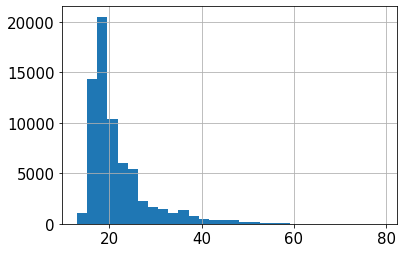

In [ ]:
microdadosENEM2019ALClean['NU_IDADE'].hist(bins=30)

In [ ]:
microdadosENEM2019ALClean.query('IN_TREINEIRO == 1')['NU_INSCRICAO'].count()

7588

In [ ]:
#Nota da prova de Ciências da Natureza

#microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CN'].mean().sort_values(by=['NU_NOTA_CN'],ascending=False)
#microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CN'].median().sort_values(by=['NU_NOTA_CN'],ascending=False)
#microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CN'].var().sort_values(by=['NU_NOTA_CN'],ascending=False)
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CN'].std().sort_values(by=['NU_NOTA_CN'],ascending=False)

In [ ]:
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CN'].median().sort_values(by=['NU_NOTA_CN'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN
46                  2704302      463.30
2                   2700300      457.30
50                  2704708      451.90
43                  2704005      450.90
55                  2705200      448.10
..                      ...         ...
95                  2708956      415.50
52                  2704906      414.10
87                  2708204      414.05
37                  2703502      413.50
65                  2706208      412.20

[102 rows x 2 columns]

In [ ]:
#https://medium.com/horadecodar/como-usar-o-query-do-pandas-fdf4a00727dc
dfProvaNotaCNMunAL = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_MT'].median()
all_muni_al_provas_nota_cn = all_muni.copy()
all_muni_al_provas_nota_cn = all_muni_al_provas_nota_cn.merge(dfProvaNotaCNMunAL, how="left", left_on="code_muni", right_on="CO_MUNICIPIO_RESIDENCIA")

In [ ]:
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#https://dbader.org/blog/pythonic-loops
provas = {'NU_NOTA_CN': 'Ciências da Natureza', 'NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC': 'Linguagens e Códigos', 'NU_NOTA_MT': 'Matemática', 'NU_NOTA_REDACAO': 'Redação'}

PROVA  MEDIANA
0  Ciências da Natureza   430.75
1      Ciências Humanas   462.10
2  Linguagens e Códigos   488.60
3            Matemática   449.90
4               Redação   540.00

In [ ]:
#Medidas de tendência central das notas das provas (Nível I do Inse)
medidaProvasNivel1 = []

In [ ]:
cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_NOTA_CN'].median()
medidaProvasNivel1.append(['Ciências da Natureza',cn])

In [ ]:
ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_NOTA_CH'].median()
medidaProvasNivel1.append(['Ciências Humanas',ch])

In [ ]:
lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_NOTA_LC'].median()
medidaProvasNivel1.append(['Linguagens e Códigos',lc])

In [ ]:
mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_NOTA_MT'].median()
medidaProvasNivel1.append(['Matemática',mt])

In [ ]:
redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_NOTA_REDACAO'].median()
medidaProvasNivel1.append(['Redação',redacao])

In [ ]:
dfNotasNivel1Clean = pd.DataFrame(medidaProvasNivel1,columns=['PROVA','MEDIANA'])

In [ ]:
dfNotasNivel1Clean

PROVA  MEDIANA
0  Ciências da Natureza   430.75
1      Ciências Humanas   462.10
2  Linguagens e Códigos   488.60
3            Matemática   449.90
4               Redação   540.00

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível I do Inse)
queryNivel1 = 'IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"'
medianaNivel1 = []

for campo, desc in provas.items():
  tempNivel1 = microdadosENEM2019ALClean.query(queryNivel1)[campo].median()
  medianaNivel1.append([desc,tempNivel1])

dfNivel1 = pd.DataFrame(medianaNivel1,columns=['PROVA','MEDIANA'])

dfNivel1

PROVA  MEDIANA
0  Ciências da Natureza   430.75
1      Ciências Humanas   462.10
2  Linguagens e Códigos   488.60
3            Matemática   449.90
4               Redação   540.00

Text(0.5, 1.0, 'Notas das provas - Nível I do Inse')

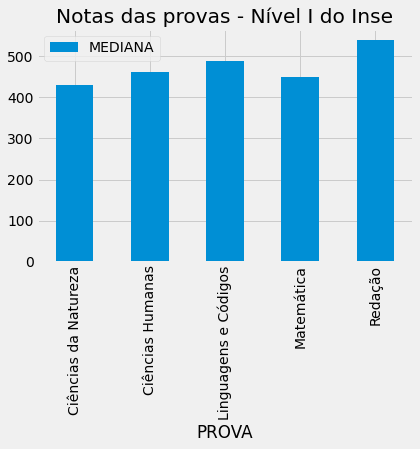

In [ ]:
matplotlib.style.use('fivethirtyeight')
dfNotasNivel1Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível I do Inse")

In [ ]:
#Quantidade Nível I
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and Q001 == "B" and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B"')['NU_INSCRICAO'].count()

6894

Text(0.5, 1.0, 'Notas das provas - Nível II do Inse')

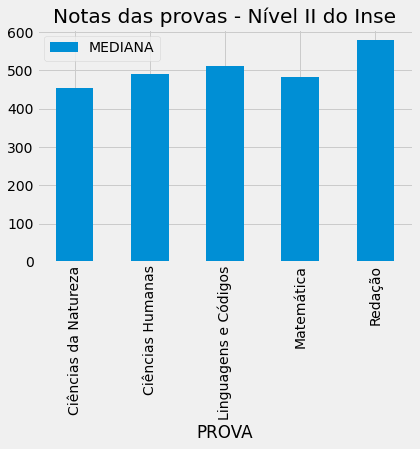

In [ ]:
#Medidas de tendência central das notas das provas (Nível II do Inse)
medidaProvasNivel2 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_NOTA_CN'].median()
medidaProvasNivel2.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_NOTA_CH'].median()
medidaProvasNivel2.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_NOTA_LC'].median()
medidaProvasNivel2.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_NOTA_MT'].median()
medidaProvasNivel2.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_NOTA_REDACAO'].median()
medidaProvasNivel2.append(['Redação',redacao])

dfNotasNivel2Clean = pd.DataFrame(medidaProvasNivel2,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel2Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível II do Inse")

In [ ]:
dfNotasNivel2Clean

PROVA  MEDIANA
0  Ciências da Natureza    455.2
1      Ciências Humanas    490.7
2  Linguagens e Códigos    511.3
3            Matemática    482.4
4               Redação    580.0

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível II do Inse)
queryNivel2 = 'IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))'
medianaNivel2 = []

for campo, desc in provas.items():
  tempNivel2 = microdadosENEM2019ALClean.query(queryNivel2)[campo].median()
  medianaNivel2.append([desc,tempNivel2])

dfNivel2 = pd.DataFrame(medianaNivel2,columns=['PROVA','MEDIANA'])

dfNivel2

PROVA  MEDIANA
0  Ciências da Natureza    455.2
1      Ciências Humanas    490.7
2  Linguagens e Códigos    511.3
3            Matemática    482.4
4               Redação    580.0

In [ ]:
#Quantidade Nível II
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("B","C") and Q002 in ("B","C") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q019 == "B") or (Q013 =="B" and Q014 == "B" and Q009 in ("D","E"))')['NU_INSCRICAO'].count()

15095

Text(0.5, 1.0, 'Notas das provas - Nível III do Inse')

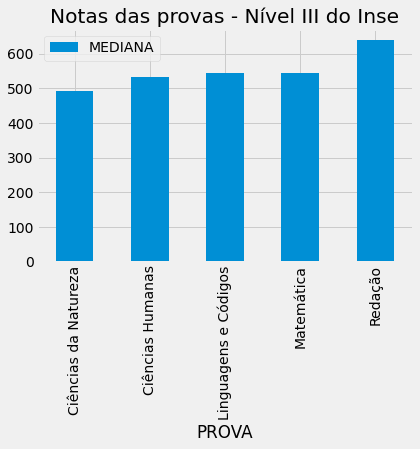

In [ ]:
#Medidas de tendência central das notas das provas (Nível III do Inse)
medidaProvasNivel3 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_NOTA_CN'].median()
medidaProvasNivel3.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_NOTA_CH'].median()
medidaProvasNivel3.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_NOTA_LC'].median()
medidaProvasNivel3.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_NOTA_MT'].median()
medidaProvasNivel3.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_NOTA_REDACAO'].median()
medidaProvasNivel3.append(['Redação',redacao])

dfNotasNivel3Clean = pd.DataFrame(medidaProvasNivel3,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel3Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível III do Inse")

In [ ]:
dfNotasNivel3Clean

PROVA  MEDIANA
0  Ciências da Natureza    493.8
1      Ciências Humanas    533.7
2  Linguagens e Códigos    543.5
3            Matemática    545.5
4               Redação    640.0

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível III do Inse)
queryNivel3 = 'IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")'
medianaNivel3 = []

for campo, desc in provas.items():
  tempNivel3 = microdadosENEM2019ALClean.query(queryNivel3)[campo].median()
  medianaNivel3.append([desc,tempNivel3])

dfNivel3 = pd.DataFrame(medianaNivel3,columns=['PROVA','MEDIANA'])

dfNivel3

PROVA  MEDIANA
0  Ciências da Natureza    493.8
1      Ciências Humanas    533.7
2  Linguagens e Códigos    543.5
3            Matemática    545.5
4               Redação    640.0

In [ ]:
#Quantidade Nível III
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q010 == "A" and Q012 == "B" and Q014 == "B" and Q018 == "A" and Q019 == "B" and Q024 == "A" and Q025 == "B") or (Q013 == "B" and Q016 == "B")')['NU_INSCRICAO'].count()

9739

Text(0.5, 1.0, 'Notas das provas - Nível IV do Inse')

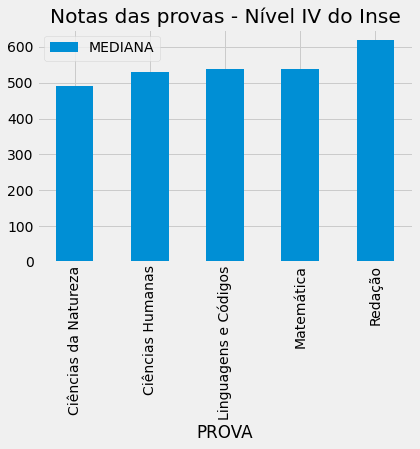

In [ ]:
#Medidas de tendência central das notas das provas (Nível IV do Inse)
medidaProvasNivel4 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_NOTA_CN'].median()
medidaProvasNivel4.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_NOTA_CH'].median()
medidaProvasNivel4.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_NOTA_LC'].median()
medidaProvasNivel4.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_NOTA_MT'].median()
medidaProvasNivel4.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_NOTA_REDACAO'].median()
medidaProvasNivel4.append(['Redação',redacao])

dfNotasNivel4Clean = pd.DataFrame(medidaProvasNivel4,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel4Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível IV do Inse")

In [ ]:
dfNotasNivel4Clean

PROVA  MEDIANA
0  Ciências da Natureza    489.9
1      Ciências Humanas    528.8
2  Linguagens e Códigos    538.7
3            Matemática    538.7
4               Redação    620.0

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível IV do Inse)
queryNivel4 = 'IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")'
medianaNivel4 = []

for campo, desc in provas.items():
  tempNivel4 = microdadosENEM2019ALClean.query(queryNivel4)[campo].median()
  medianaNivel4.append([desc,tempNivel4])

dfNivel4 = pd.DataFrame(medianaNivel4,columns=['PROVA','MEDIANA'])

dfNivel4

PROVA  MEDIANA
0  Ciências da Natureza    489.9
1      Ciências Humanas    528.8
2  Linguagens e Códigos    538.7
3            Matemática    538.7
4               Redação    620.0

In [ ]:
#Quantidade Nível IV
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("D","E") and Q002 in ("D","E") and Q008 == "B" and Q009 in ("B","C") and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q018 == "A" and Q025 == "B") or (Q010 == "B" and Q016 == "B" and Q019 in ("B","C") and Q024 == "B")')['NU_INSCRICAO'].count()

5295

Text(0.5, 1.0, 'Notas das provas - Nível V do Inse')

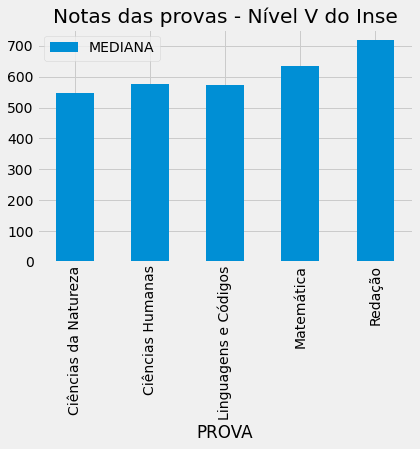

In [ ]:
#Medidas de tendência central das notas das provas (Nível V do Inse)
medidaProvasNivel5 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_NOTA_CN'].median()
medidaProvasNivel5.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_NOTA_CH'].median()
medidaProvasNivel5.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_NOTA_LC'].median()
medidaProvasNivel5.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_NOTA_MT'].median()
medidaProvasNivel5.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_NOTA_REDACAO'].median()
medidaProvasNivel5.append(['Redação',redacao])

dfNotasNivel5Clean = pd.DataFrame(medidaProvasNivel5,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel5Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível V do Inse")

In [ ]:
dfNotasNivel5Clean

PROVA  MEDIANA
0  Ciências da Natureza   548.45
1      Ciências Humanas   576.55
2  Linguagens e Códigos   574.75
3            Matemática   633.75
4               Redação   720.00

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível V do Inse)
queryNivel5 = 'IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")'
medianaNivel5 = []

for campo, desc in provas.items():
  tempNivel5 = microdadosENEM2019ALClean.query(queryNivel5)[campo].median()
  medianaNivel5.append([desc,tempNivel5])

dfNivel5 = pd.DataFrame(medianaNivel5,columns=['PROVA','MEDIANA'])

dfNivel5

PROVA  MEDIANA
0  Ciências da Natureza   548.45
1      Ciências Humanas   576.55
2  Linguagens e Códigos   574.75
3            Matemática   633.75
4               Redação   720.00

In [ ]:
#Quantidade Nível V
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 in ("E","F") and Q008 in ("B","C") and Q009 in ("B","C") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q025 == "B")')['NU_INSCRICAO'].count()

60

Text(0.5, 1.0, 'Notas das provas - Nível VI do Inse')

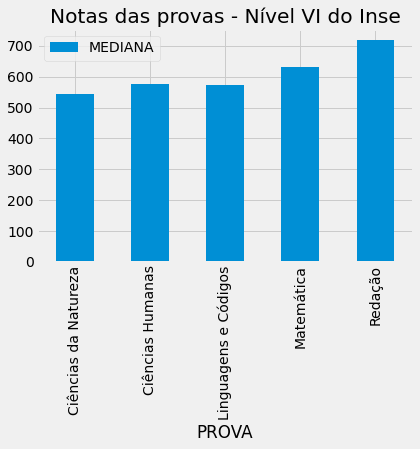

In [ ]:
#Medidas de tendência central das notas das provas (Nível VI do Inse)
medidaProvasNivel6 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_CN'].median()
medidaProvasNivel6.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_CH'].median()
medidaProvasNivel6.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_LC'].median()
medidaProvasNivel6.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_MT'].median()
medidaProvasNivel6.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_REDACAO'].median()
medidaProvasNivel6.append(['Redação',redacao])

dfNotasNivel6Clean = pd.DataFrame(medidaProvasNivel6,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel6Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível VI do Inse")

In [ ]:
dfNotasNivel6Clean

PROVA  MEDIANA
0  Ciências da Natureza   545.65
1      Ciências Humanas   575.40
2  Linguagens e Códigos   572.70
3            Matemática   630.60
4               Redação   720.00

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível VI do Inse)
queryNivel6 = 'IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))'
medianaNivel6 = []

for campo, desc in provas.items():
  tempNivel6 = microdadosENEM2019ALClean.query(queryNivel6)[campo].median()
  medianaNivel6.append([desc,tempNivel6])

dfNivel6 = pd.DataFrame(medianaNivel6,columns=['PROVA','MEDIANA'])

dfNivel6

PROVA  MEDIANA
0  Ciências da Natureza   545.65
1      Ciências Humanas   575.40
2  Linguagens e Códigos   572.70
3            Matemática   630.60
4               Redação   720.00

In [ ]:
#Quantidade Nível VI
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 == "B" and Q009 in ("C","D","E") and Q010 == "B" and Q012 == "B" and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_INSCRICAO'].count()

1748

Text(0.5, 1.0, 'Notas das provas - Nível VII do Inse')

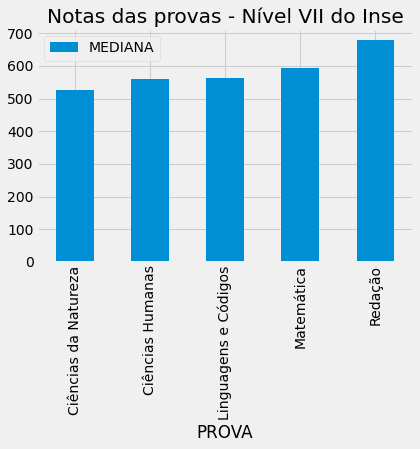

In [ ]:
#Medidas de tendência central das notas das provas (Nível VII do Inse)
medidaProvasNivel7 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_NOTA_CN'].median()
medidaProvasNivel7.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_NOTA_CH'].median()
medidaProvasNivel7.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_NOTA_LC'].median()
medidaProvasNivel7.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_NOTA_MT'].median()
medidaProvasNivel7.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_NOTA_REDACAO'].median()
medidaProvasNivel7.append(['Redação',redacao])

dfNotasNivel7Clean = pd.DataFrame(medidaProvasNivel7,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel7Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível VII do Inse")

In [ ]:
dfNotasNivel7Clean

PROVA  MEDIANA
0  Ciências da Natureza    526.9
1      Ciências Humanas    559.7
2  Linguagens e Códigos    561.5
3            Matemática    594.5
4               Redação    680.0

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível VII do Inse)
queryNivel7 = 'IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))'
medianaNivel7 = []

for campo, desc in provas.items():
  tempNivel7 = microdadosENEM2019ALClean.query(queryNivel7)[campo].median()
  medianaNivel7.append([desc,tempNivel7])

dfNivel7 = pd.DataFrame(medianaNivel7,columns=['PROVA','MEDIANA'])

dfNivel7

PROVA  MEDIANA
0  Ciências da Natureza    526.9
1      Ciências Humanas    559.7
2  Linguagens e Códigos    561.5
3            Matemática    594.5
4               Redação    680.0

In [ ]:
#Quantidade Nível VII
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 in ("E","F") and Q002 in ("E","F") and Q008 in ("B","D","E") and Q009 in ("D","E") and Q010 == ("B","C","D","E") and Q013 == "B" and Q014 == "B" and Q016 == "B" and Q018 == "B" and Q025 == "B") or (Q024 in ("C","D","E") and Q019 in ("D","E") or Q012 in ("C","D","E"))')['NU_INSCRICAO'].count()

2947

Text(0.5, 1.0, 'Notas das provas - Nível VIII do Inse')

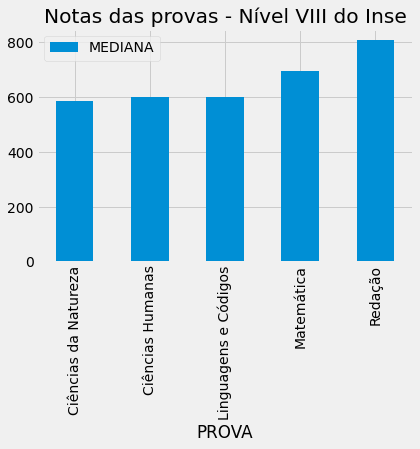

In [ ]:
#Medidas de tendência central das notas das provas (Nível VIII do Inse)
medidaProvasNivel8 = []

cn = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_CN'].median()
medidaProvasNivel8.append(['Ciências da Natureza',cn])

ch = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_CH'].median()
medidaProvasNivel8.append(['Ciências Humanas',ch])

lc = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_LC'].median()
medidaProvasNivel8.append(['Linguagens e Códigos',lc])

mt = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_MT'].median()
medidaProvasNivel8.append(['Matemática',mt])

redacao = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_NOTA_REDACAO'].median()
medidaProvasNivel8.append(['Redação',redacao])

dfNotasNivel8Clean = pd.DataFrame(medidaProvasNivel8,columns=['PROVA','MEDIANA'])

matplotlib.style.use('fivethirtyeight')
dfNotasNivel8Clean.set_index('PROVA').plot(kind="bar")
matplotlib.pyplot.title("Notas das provas - Nível VIII do Inse")

In [ ]:
dfNotasNivel8Clean

PROVA  MEDIANA
0  Ciências da Natureza   588.40
1      Ciências Humanas   600.40
2  Linguagens e Códigos   602.25
3            Matemática   697.50
4               Redação   810.00

In [ ]:
#PYTHONIC - Medidas de tendência central das notas das provas (Nível VIII do Inse)
queryNivel8 = 'IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))'
medianaNivel8 = []

for campo, desc in provas.items():
  tempNivel8 = microdadosENEM2019ALClean.query(queryNivel8)[campo].median()
  medianaNivel8.append([desc,tempNivel8])

dfNivel8 = pd.DataFrame(medianaNivel8,columns=['PROVA','MEDIANA'])

dfNivel8

PROVA  MEDIANA
0  Ciências da Natureza   588.40
1      Ciências Humanas   600.40
2  Linguagens e Códigos   602.25
3            Matemática   697.50
4               Redação   810.00

In [ ]:
#Quantidade Nível VIII
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0 and (Q001 == "F" and Q002 == "F" and Q008 in ("D","E") and Q010 == ("C","D","E") and Q012 in ("C","D","E") and Q024 in ("C","D","E") and Q019 in ("D","E"))')['NU_INSCRICAO'].count()

26

In [ ]:
dfProvaNotaCNMunAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CO_MUNICIPIO_RESIDENCIA  102 non-null    int64  
 1   NU_NOTA_CN               102 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [ ]:
dfProvaNotaCNMunAL.head()

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN
0                  2700102  431.679310
1                  2700201  437.071429
2                  2700300  442.051969
3                  2700409  424.184706
4                  2700508  409.580952

In [ ]:
#https://www.delftstack.com/pt/api/python-pandas/pandas-dataframe-dataframe.boxplot-function/
#https://operdata.com.br/blog/como-interpretar-um-boxplot/
#https://www.voitto.com.br/blog/artigo/boxplot
#https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median-faqs.php

dfProvaNotaCompletoMunAL = microdadosENEM2019ALClean.query('IN_TREINEIRO == 0')

In [ ]:
dfProvaNotaCompletoMunAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61162 entries, 0 to 91703
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 63.9+ MB


In [ ]:
dfProvaNotaCompletoMunAL.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001339053    2019                  2709103  ...    A     B    B
1  190001339054    2019                  2704708  ...    A     A    B
2  190001339055    2019                  2704302  ...    A     A    A
3  190001339056    2019                  2708105  ...    A     B    B
7  190001339060    2019                  2702603  ...    A     A    A

[5 rows x 136 columns]

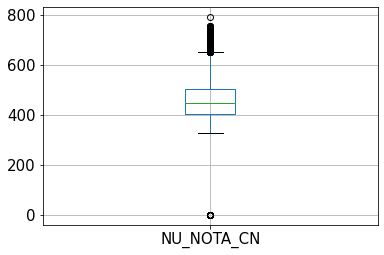

In [ ]:
dfProvaNotaCompletoMunAL.boxplot(column=['NU_NOTA_CN']).plot()

matplotlib.pyplot.show()

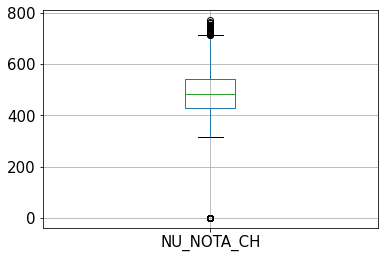

In [ ]:
dfProvaNotaCompletoMunAL.boxplot(column=['NU_NOTA_CH']).plot()

matplotlib.pyplot.show()

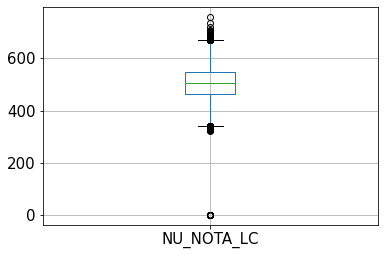

In [ ]:
dfProvaNotaCompletoMunAL.boxplot(column=['NU_NOTA_LC']).plot()

matplotlib.pyplot.show()

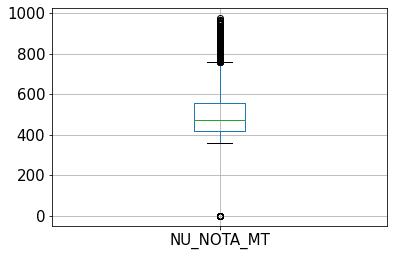

In [ ]:
dfProvaNotaCompletoMunAL.boxplot(column=['NU_NOTA_MT']).plot()

matplotlib.pyplot.show()

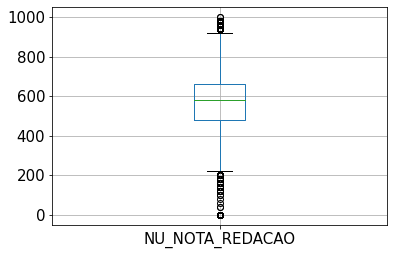

In [ ]:
dfProvaNotaCompletoMunAL.boxplot(column=['NU_NOTA_REDACAO']).plot()

matplotlib.pyplot.show()

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

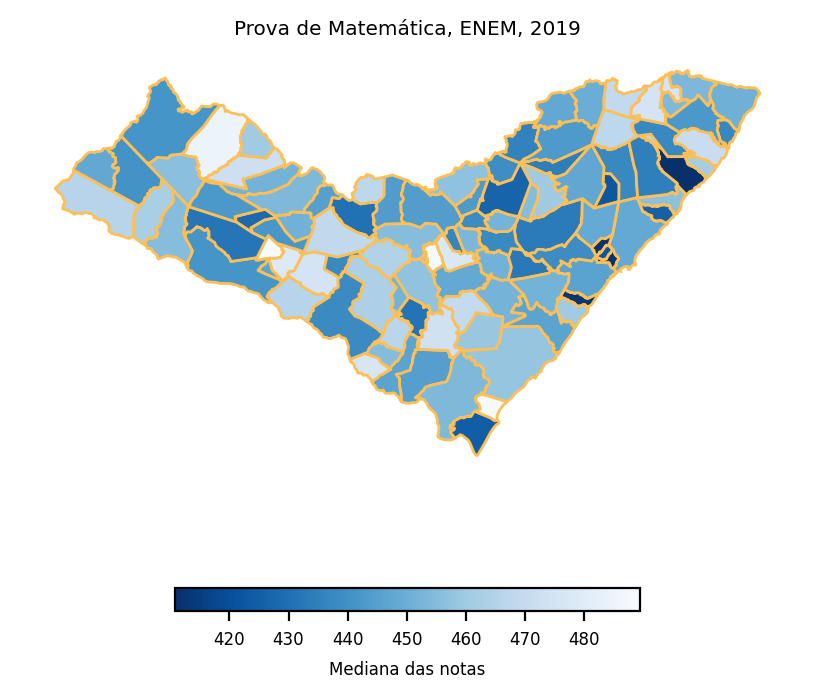

In [ ]:
matplotlib.pyplot.rcParams.update({"font.size": 6})

fig, ax = matplotlib.pyplot.subplots(figsize=(5, 5), dpi=200)

all_muni_al_provas_nota_cn.plot(
    column="NU_NOTA_MT",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Mediana das notas",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="#FEBF57",
    ax=ax,
)

ax.set_title("Prova de Matemática, ENEM, 2019")
ax.axis("off")

In [ ]:
#Nota da prova de Ciências Humanas

microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CH'].std().sort_values(by=['NU_NOTA_CH'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_CH
13                  2701357   93.565239
19                  2701902   84.866450
46                  2704302   82.561371
61                  2705804   82.075644
36                  2703403   80.701742
..                      ...         ...
65                  2706208   62.992943
95                  2708956   61.977489
62                  2705903   60.312381
96                  2709004   59.968799
63                  2706000   56.083194

[102 rows x 2 columns]

In [ ]:
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_CH'].median().sort_values(by=['NU_NOTA_CH'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_CH
46                  2704302      503.80
2                   2700300      497.50
49                  2704609      494.40
66                  2706307      488.90
50                  2704708      488.60
..                      ...         ...
17                  2701704      446.30
65                  2706208      440.90
79                  2707404      437.65
87                  2708204      435.80
37                  2703502      432.40

[102 rows x 2 columns]

In [ ]:
#Nota da prova de Linguagens e Códigos

microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_LC'].std().sort_values(by=['NU_NOTA_LC'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_LC
13                  2701357   96.239836
61                  2705804   71.078650
41                  2703809   67.773633
33                  2703106   67.332968
92                  2708709   65.901932
..                      ...         ...
65                  2706208   51.422707
62                  2705903   50.338865
29                  2702702   50.152862
63                  2706000   49.805862
95                  2708956   47.858309

[102 rows x 2 columns]

In [ ]:
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_LC'].median().sort_values(by=['NU_NOTA_LC'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_LC
46                  2704302      521.30
2                   2700300      516.40
49                  2704609      513.30
50                  2704708      511.50
75                  2707008      508.80
..                      ...         ...
53                  2705002      474.20
65                  2706208      471.40
10                  2701100      470.50
87                  2708204      468.85
37                  2703502      449.10

[102 rows x 2 columns]

In [ ]:
#Nota da prova de Matemática

microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_MT'].std().sort_values(by=['NU_NOTA_MT'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_MT
46                  2704302  111.771955
2                   2700300  106.719226
66                  2706307   97.840091
50                  2704708   97.543735
1                   2700201   96.427282
..                      ...         ...
8                   2700904   66.364567
95                  2708956   61.998666
96                  2709004   61.453337
65                  2706208   60.513697
37                  2703502   55.993335

[102 rows x 2 columns]

In [ ]:
microdadosENEM2019ALClean.query('IN_TREINEIRO == 0').groupby(['CO_MUNICIPIO_RESIDENCIA'], as_index = False)['NU_NOTA_MT'].median().sort_values(by=['NU_NOTA_MT'],ascending=False)

CO_MUNICIPIO_RESIDENCIA  NU_NOTA_MT
2                   2700300      491.90
46                  2704302      488.60
49                  2704609      480.80
43                  2704005      478.00
51                  2704807      476.20
..                      ...         ...
70                  2706505      436.90
95                  2708956      435.20
10                  2701100      433.00
52                  2704906      429.10
75                  2707008      426.35

[102 rows x 2 columns]

In [ ]:
#Indicador de Nível Socioeconômico (Inse) do Sistema Nacional de Avaliação da Educação Básica (Saeb) 2019 em Alagoas

dfINSE2019 = pd.read_csv('INSE_2019_ALAGOAS.csv', sep=";", encoding="UTF-8")
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dfINSE2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_UF            102 non-null    int64  
 1   NOME_UF          102 non-null    object 
 2   CO_MUNICIPIO     102 non-null    int64  
 3   NOME_MUNICIPIO   102 non-null    object 
 4   TP_TIPO_REDE     102 non-null    int64  
 5   TP_LOCALIZACAO   102 non-null    int64  
 6   QTD_ALUNOS_INSE  102 non-null    int64  
 7   MEDIA_INSE       102 non-null    float64
 8   PC_NIVEL_1       102 non-null    float64
 9   PC_NIVEL_2       102 non-null    float64
 10  PC_NIVEL_3       102 non-null    float64
 11  PC_NIVEL_4       102 non-null    float64
 12  PC_NIVEL_5       102 non-null    float64
 13  PC_NIVEL_6       102 non-null    float64
 14  PC_NIVEL_7       102 non-null    float64
 15  PC_NIVEL_8       102 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 12.9+ KB


In [ ]:
dfINSE2019[['CO_MUNICIPIO','MEDIA_INSE']].head()

CO_MUNICIPIO  MEDIA_INSE
0       2700102      4.0734
1       2700201      4.0068
2       2700300      4.4929
3       2700409      4.0474
4       2700508      4.1843

In [ ]:
inseAL2019 = dfINSE2019[['CO_MUNICIPIO','MEDIA_INSE']]
all_muni_al_inse_2019 = all_muni.copy()
all_muni_al_inse_2019 = all_muni_al_inse_2019.merge(inseAL2019, how="left", left_on="code_muni", right_on="CO_MUNICIPIO")

In [ ]:
#PROBLEMA RESOLVIDO: SUBSTITUIR A VÍRGULA POR PONTO COMO SEPARADOR DECIMAL!!!
#https://www.delftstack.com/pt/howto/python-pandas/pandas-convert-object-to-float/
#all_muni_al_inse_2019['MEDIA_INSE'] = all_muni_al_inse_2019['MEDIA_INSE'].astype(float, errors = 'raise')

In [ ]:
all_muni_al_inse_2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_muni     102 non-null    float64 
 1   name_muni     102 non-null    object  
 2   code_state    102 non-null    float64 
 3   abbrev_state  102 non-null    object  
 4   name_state    102 non-null    object  
 5   code_region   102 non-null    float64 
 6   name_region   102 non-null    object  
 7   geometry      102 non-null    geometry
 8   CO_MUNICIPIO  102 non-null    int64   
 9   MEDIA_INSE    102 non-null    float64 
dtypes: float64(4), geometry(1), int64(1), object(4)
memory usage: 8.8+ KB


In [ ]:
all_muni_al_inse_2019.head()

code_muni               name_muni  ...  CO_MUNICIPIO MEDIA_INSE
0  2700102.0             Água Branca  ...       2700102     4.0734
1  2700201.0                  Anadia  ...       2700201     4.0068
2  2700300.0               Arapiraca  ...       2700300     4.4929
3  2700409.0                 Atalaia  ...       2700409     4.0474
4  2700508.0  Barra De Santo Antônio  ...       2700508     4.1843

[5 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

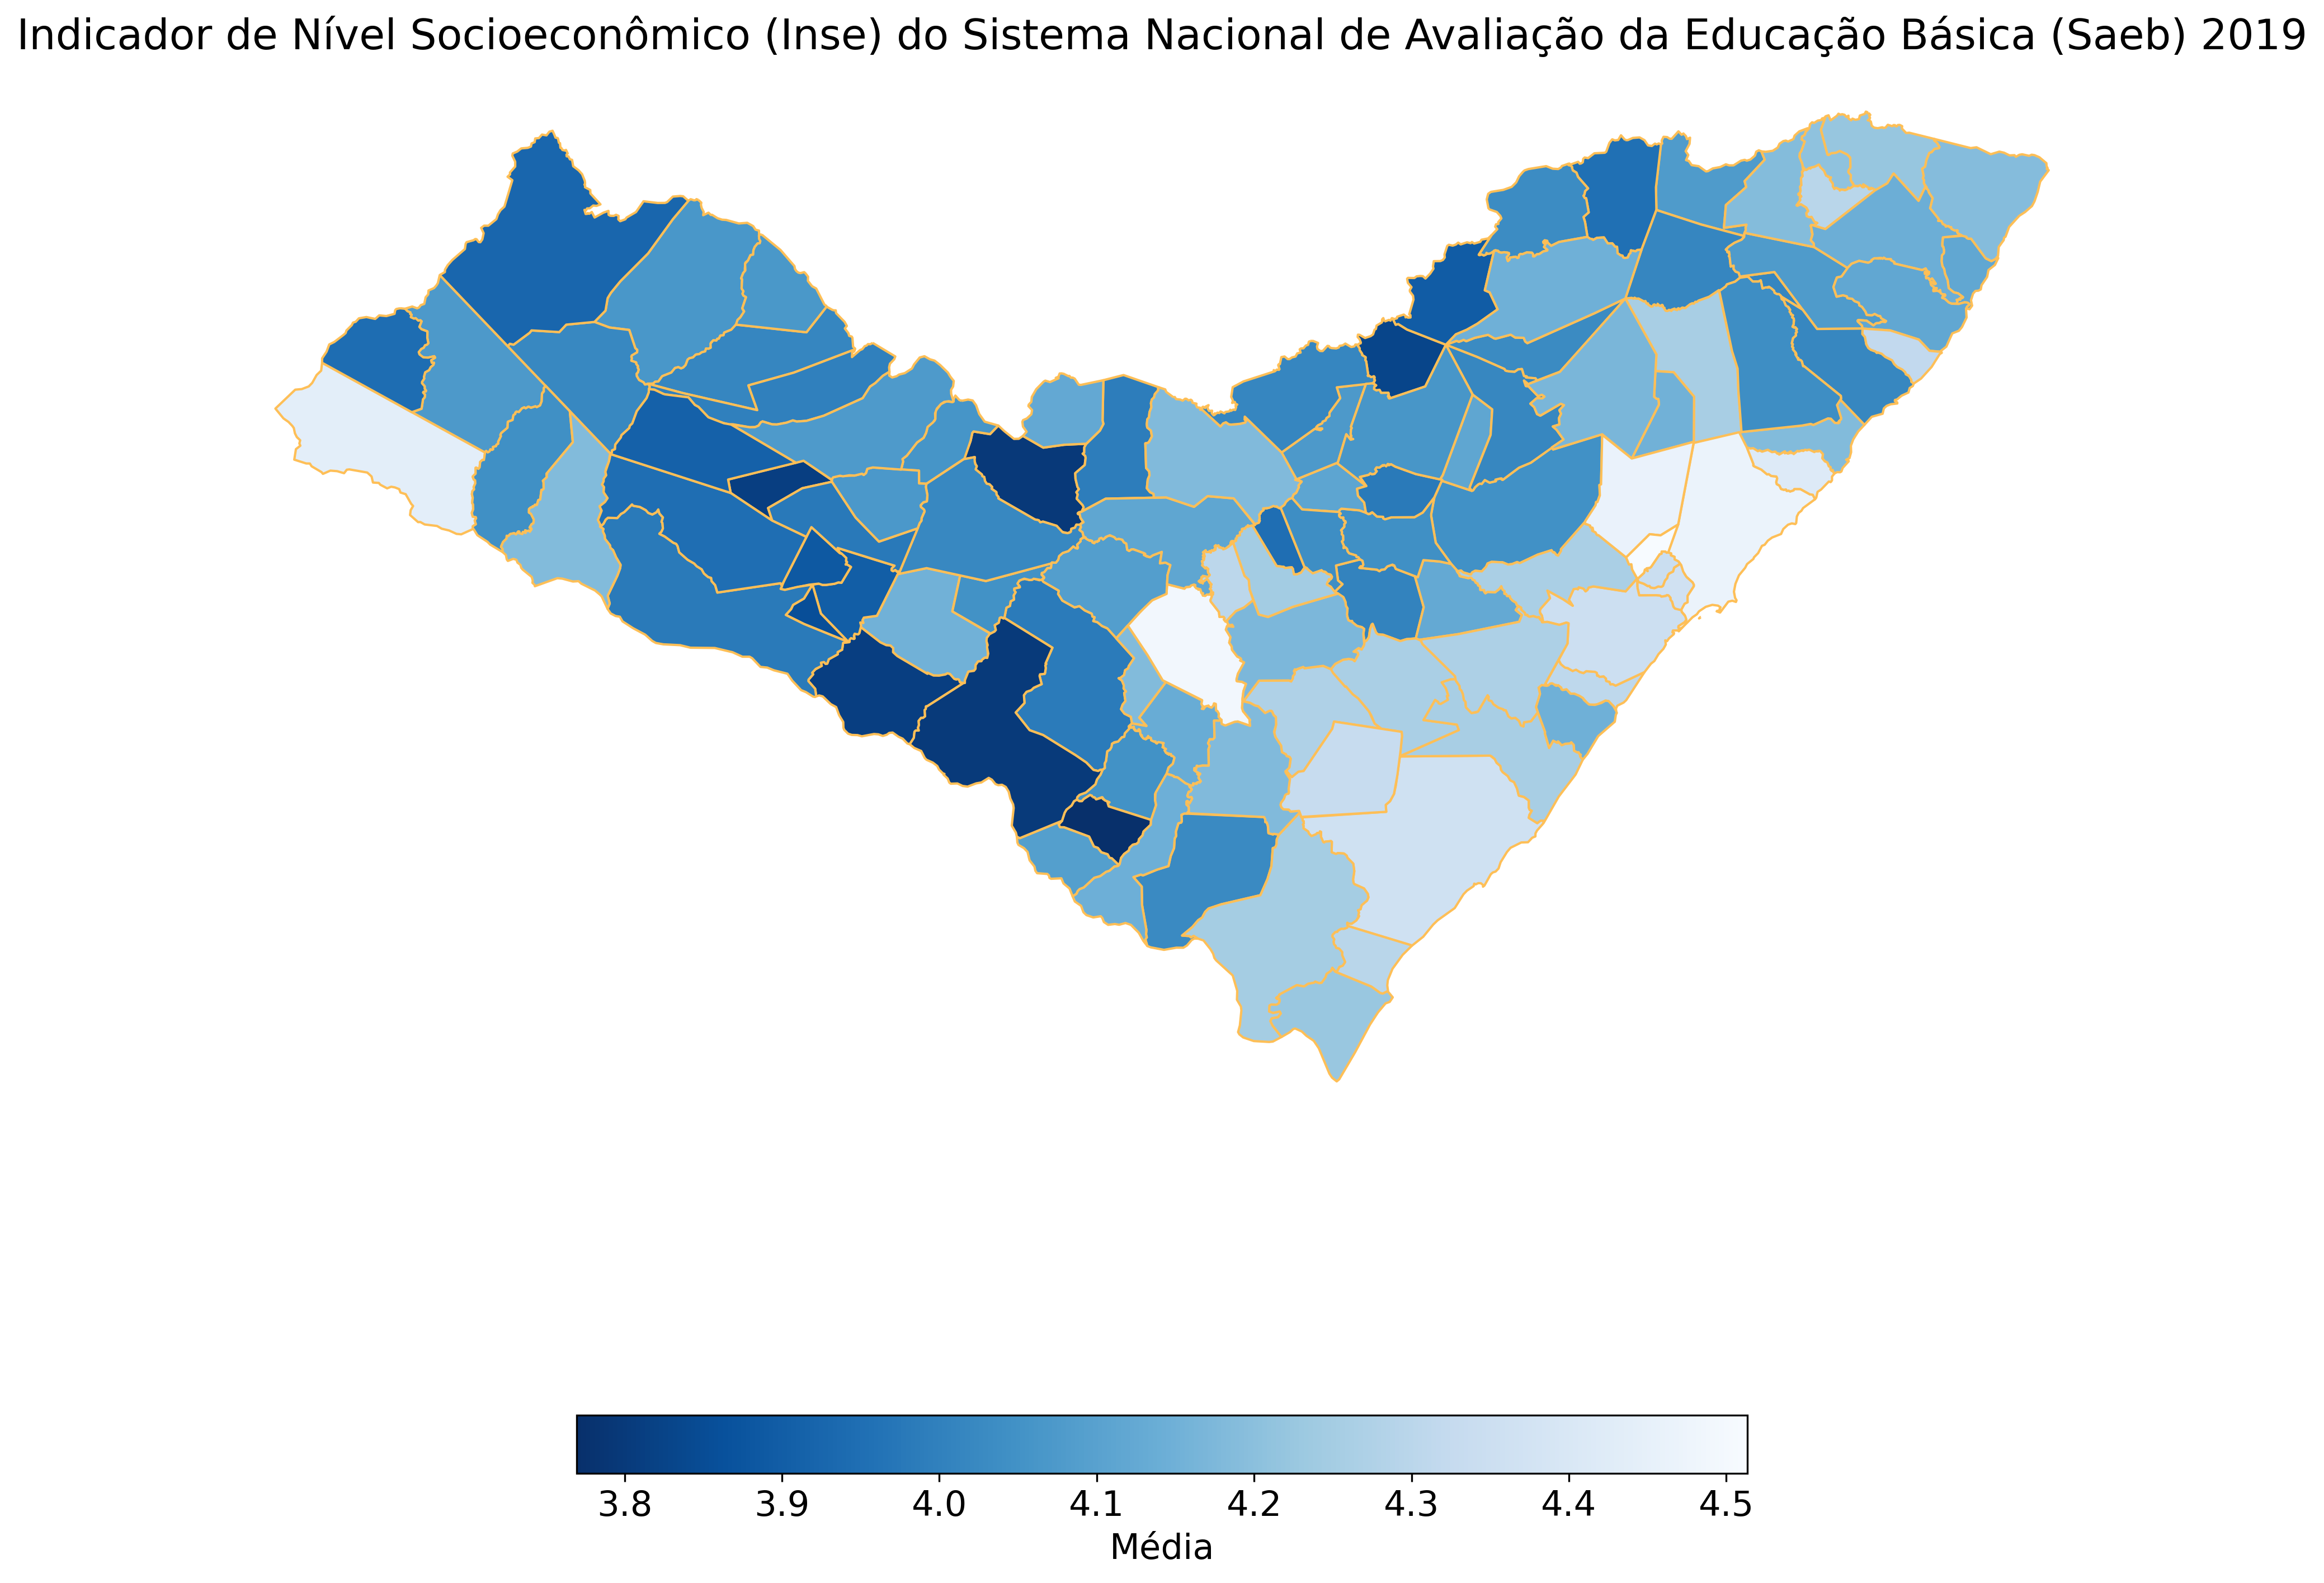

In [ ]:
matplotlib.pyplot.rcParams.update({"font.size": 15})

fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15), dpi=300)

all_muni_al_inse_2019.plot(
    column="MEDIA_INSE",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Média",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="#FEBF57",
    ax=ax,
)

ax.set_title("Indicador de Nível Socioeconômico (Inse) do Sistema Nacional de Avaliação da Educação Básica (Saeb) 2019")
ax.axis("off")

In [ ]:
#Taxas de Rendimento Escolar (Aprovação, Reprovação e Abandono) no Nível Médio, em Alagoas - 2019
 
dfTXREND2019 = pd.read_csv('tx_rend_municipios_AL_2019.csv', sep=";", encoding="UTF-8")
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dfTXREND2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             102 non-null    int64  
 1   regiao          102 non-null    object 
 2   uf              102 non-null    object 
 3   cod_municipio   102 non-null    int64  
 4   nome_municipio  102 non-null    object 
 5   tx_aprovacao    98 non-null     float64
 6   tx_reprovacao   98 non-null     float64
 7   tx_abandono     98 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.5+ KB


In [ ]:
dfTXREND2019.head()

ano    regiao  uf  ...  tx_aprovacao tx_reprovacao  tx_abandono
0  2019  Nordeste  AL  ...          95.6           1.6          2.8
1  2019  Nordeste  AL  ...          81.9           7.1         11.0
2  2019  Nordeste  AL  ...          83.4           6.8          9.8
3  2019  Nordeste  AL  ...          77.8           7.8         14.4
4  2019  Nordeste  AL  ...          88.3           0.0         11.7

[5 rows x 8 columns]

In [ ]:
dfTXREND2019.sort_values(by=['tx_abandono'],ascending=False).head(10)

ano    regiao  uf  ...  tx_aprovacao tx_reprovacao  tx_abandono
24  2019  Nordeste  AL  ...          74.1           2.9         23.0
50  2019  Nordeste  AL  ...          76.7           7.4         15.9
45  2019  Nordeste  AL  ...          71.7          12.6         15.7
22  2019  Nordeste  AL  ...          78.9           5.8         15.3
38  2019  Nordeste  AL  ...          80.6           4.7         14.7
3   2019  Nordeste  AL  ...          77.8           7.8         14.4
63  2019  Nordeste  AL  ...          78.8           6.8         14.4
41  2019  Nordeste  AL  ...          69.7          16.1         14.2
59  2019  Nordeste  AL  ...          85.5           1.4         13.1
32  2019  Nordeste  AL  ...          87.3           0.2         12.5

[10 rows x 8 columns]

In [ ]:
txrendAL2019 = dfTXREND2019[['cod_municipio','tx_abandono']]
all_muni_al_txrend_2019 = all_muni.copy()
all_muni_al_txrend_2019 = all_muni_al_txrend_2019.merge(txrendAL2019, how="left", left_on="code_muni", right_on="cod_municipio")

In [ ]:
all_muni_al_txrend_2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   code_muni      102 non-null    float64 
 1   name_muni      102 non-null    object  
 2   code_state     102 non-null    float64 
 3   abbrev_state   102 non-null    object  
 4   name_state     102 non-null    object  
 5   code_region    102 non-null    float64 
 6   name_region    102 non-null    object  
 7   geometry       102 non-null    geometry
 8   cod_municipio  102 non-null    int64   
 9   tx_abandono    98 non-null     float64 
dtypes: float64(4), geometry(1), int64(1), object(4)
memory usage: 8.8+ KB


In [ ]:
all_muni_al_txrend_2019.head()

code_muni               name_muni  ...  cod_municipio tx_abandono
0  2700102.0             Água Branca  ...        2700102         2.8
1  2700201.0                  Anadia  ...        2700201        11.0
2  2700300.0               Arapiraca  ...        2700300         9.8
3  2700409.0                 Atalaia  ...        2700409        14.4
4  2700508.0  Barra De Santo Antônio  ...        2700508        11.7

[5 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

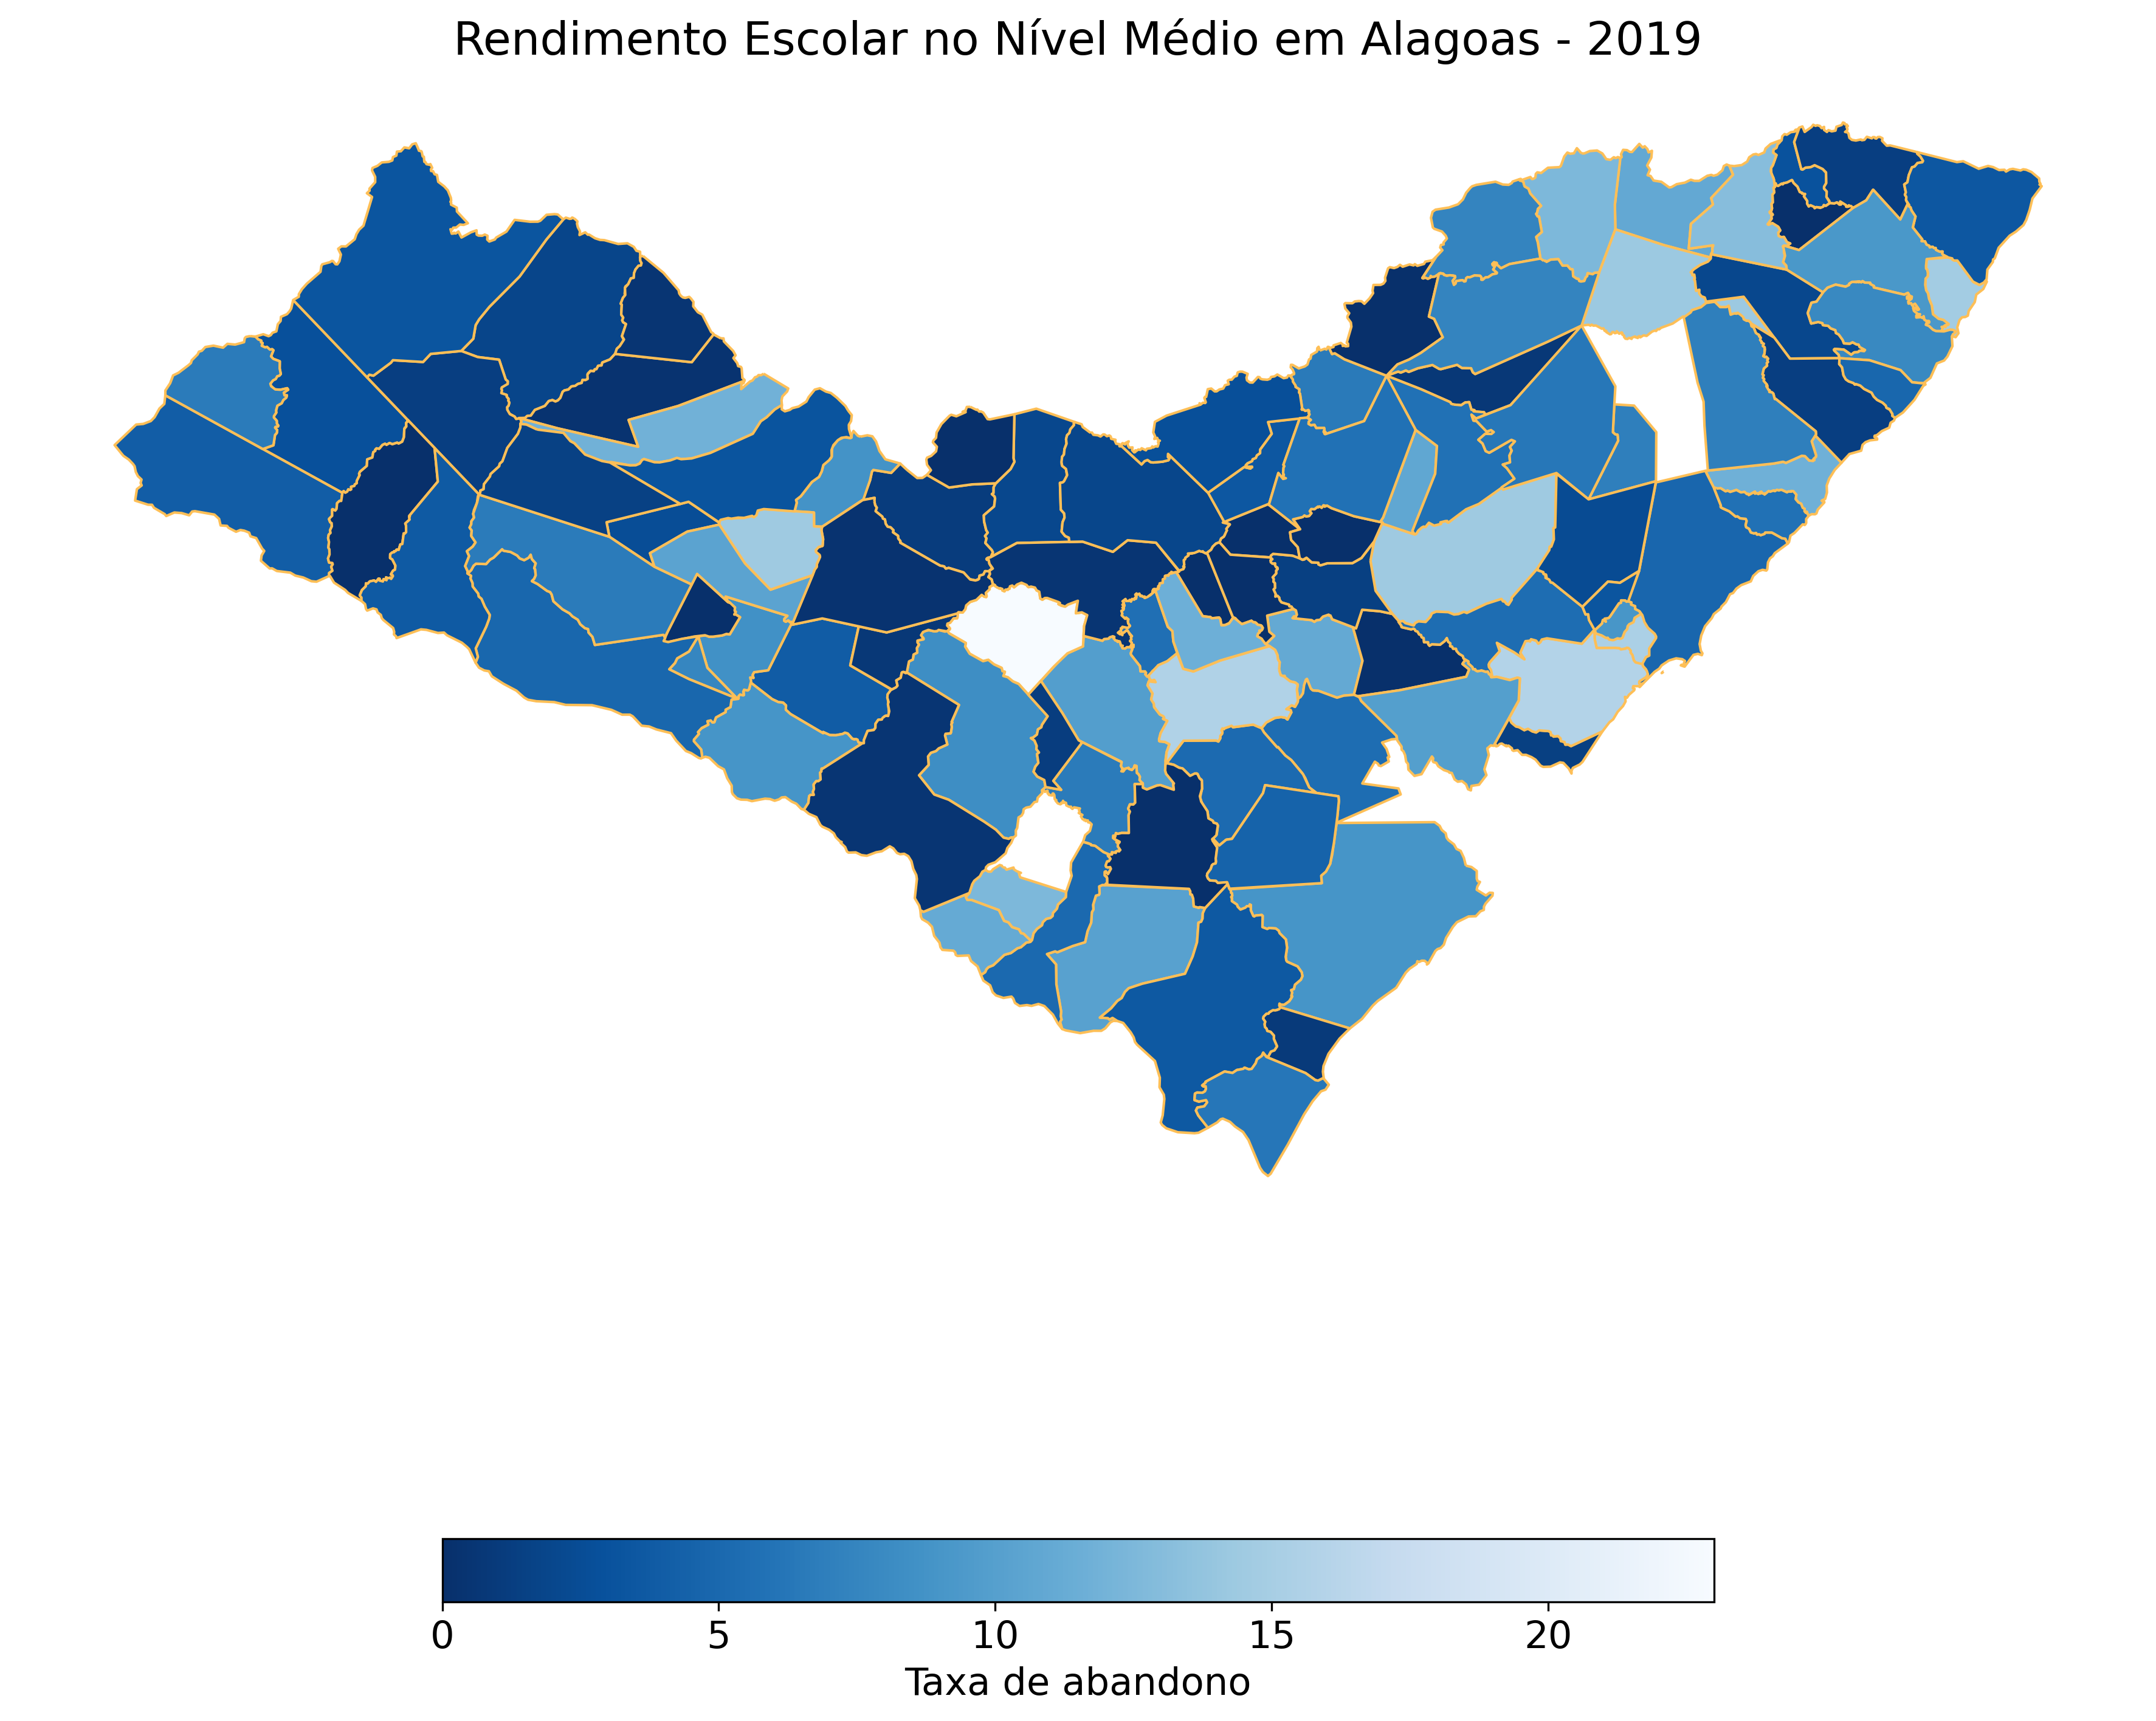

In [ ]:
matplotlib.pyplot.rcParams.update({"font.size": 15})

fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15), dpi=300)

all_muni_al_txrend_2019.plot(
    column="tx_abandono",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Taxa de abandono",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="#FEBF57",
    ax=ax,
)

ax.set_title("Rendimento Escolar no Nível Médio em Alagoas - 2019")
ax.axis("off")

In [ ]:
#Taxa de Distorção Idade-Série no Nível Médio - Alagoas - 2019

dfTDI2019 = pd.read_csv('TDI_ALAGOAS_2019.csv', sep=";", encoding="UTF-8")
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dfTDI2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             102 non-null    int64  
 1   regiao          102 non-null    object 
 2   uf              102 non-null    object 
 3   cod_municipio   102 non-null    int64  
 4   nome_municipio  102 non-null    object 
 5   tdi             98 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.9+ KB


In [ ]:
dfTDI2019.head()

ano    regiao  uf  cod_municipio          nome_municipio   tdi
0  2019  Nordeste  AL        2700102             Água Branca  38.7
1  2019  Nordeste  AL        2700201                  Anadia  30.6
2  2019  Nordeste  AL        2700300               Arapiraca  29.8
3  2019  Nordeste  AL        2700409                 Atalaia  40.7
4  2019  Nordeste  AL        2700508  Barra de Santo Antônio  28.9

In [ ]:
tdiAL2019 = dfTDI2019[['cod_municipio','tdi']]
all_muni_al_tdi_2019 = all_muni.copy()
all_muni_al_tdi_2019 = all_muni_al_tdi_2019.merge(tdiAL2019, how="left", left_on="code_muni", right_on="cod_municipio")

In [ ]:
all_muni_al_tdi_2019.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   code_muni      102 non-null    float64 
 1   name_muni      102 non-null    object  
 2   code_state     102 non-null    float64 
 3   abbrev_state   102 non-null    object  
 4   name_state     102 non-null    object  
 5   code_region    102 non-null    float64 
 6   name_region    102 non-null    object  
 7   geometry       102 non-null    geometry
 8   cod_municipio  102 non-null    int64   
 9   tdi            98 non-null     float64 
dtypes: float64(4), geometry(1), int64(1), object(4)
memory usage: 8.8+ KB


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-38.391874436550005, -34.99761784444999, -10.584813791450008, -8.72876068155)

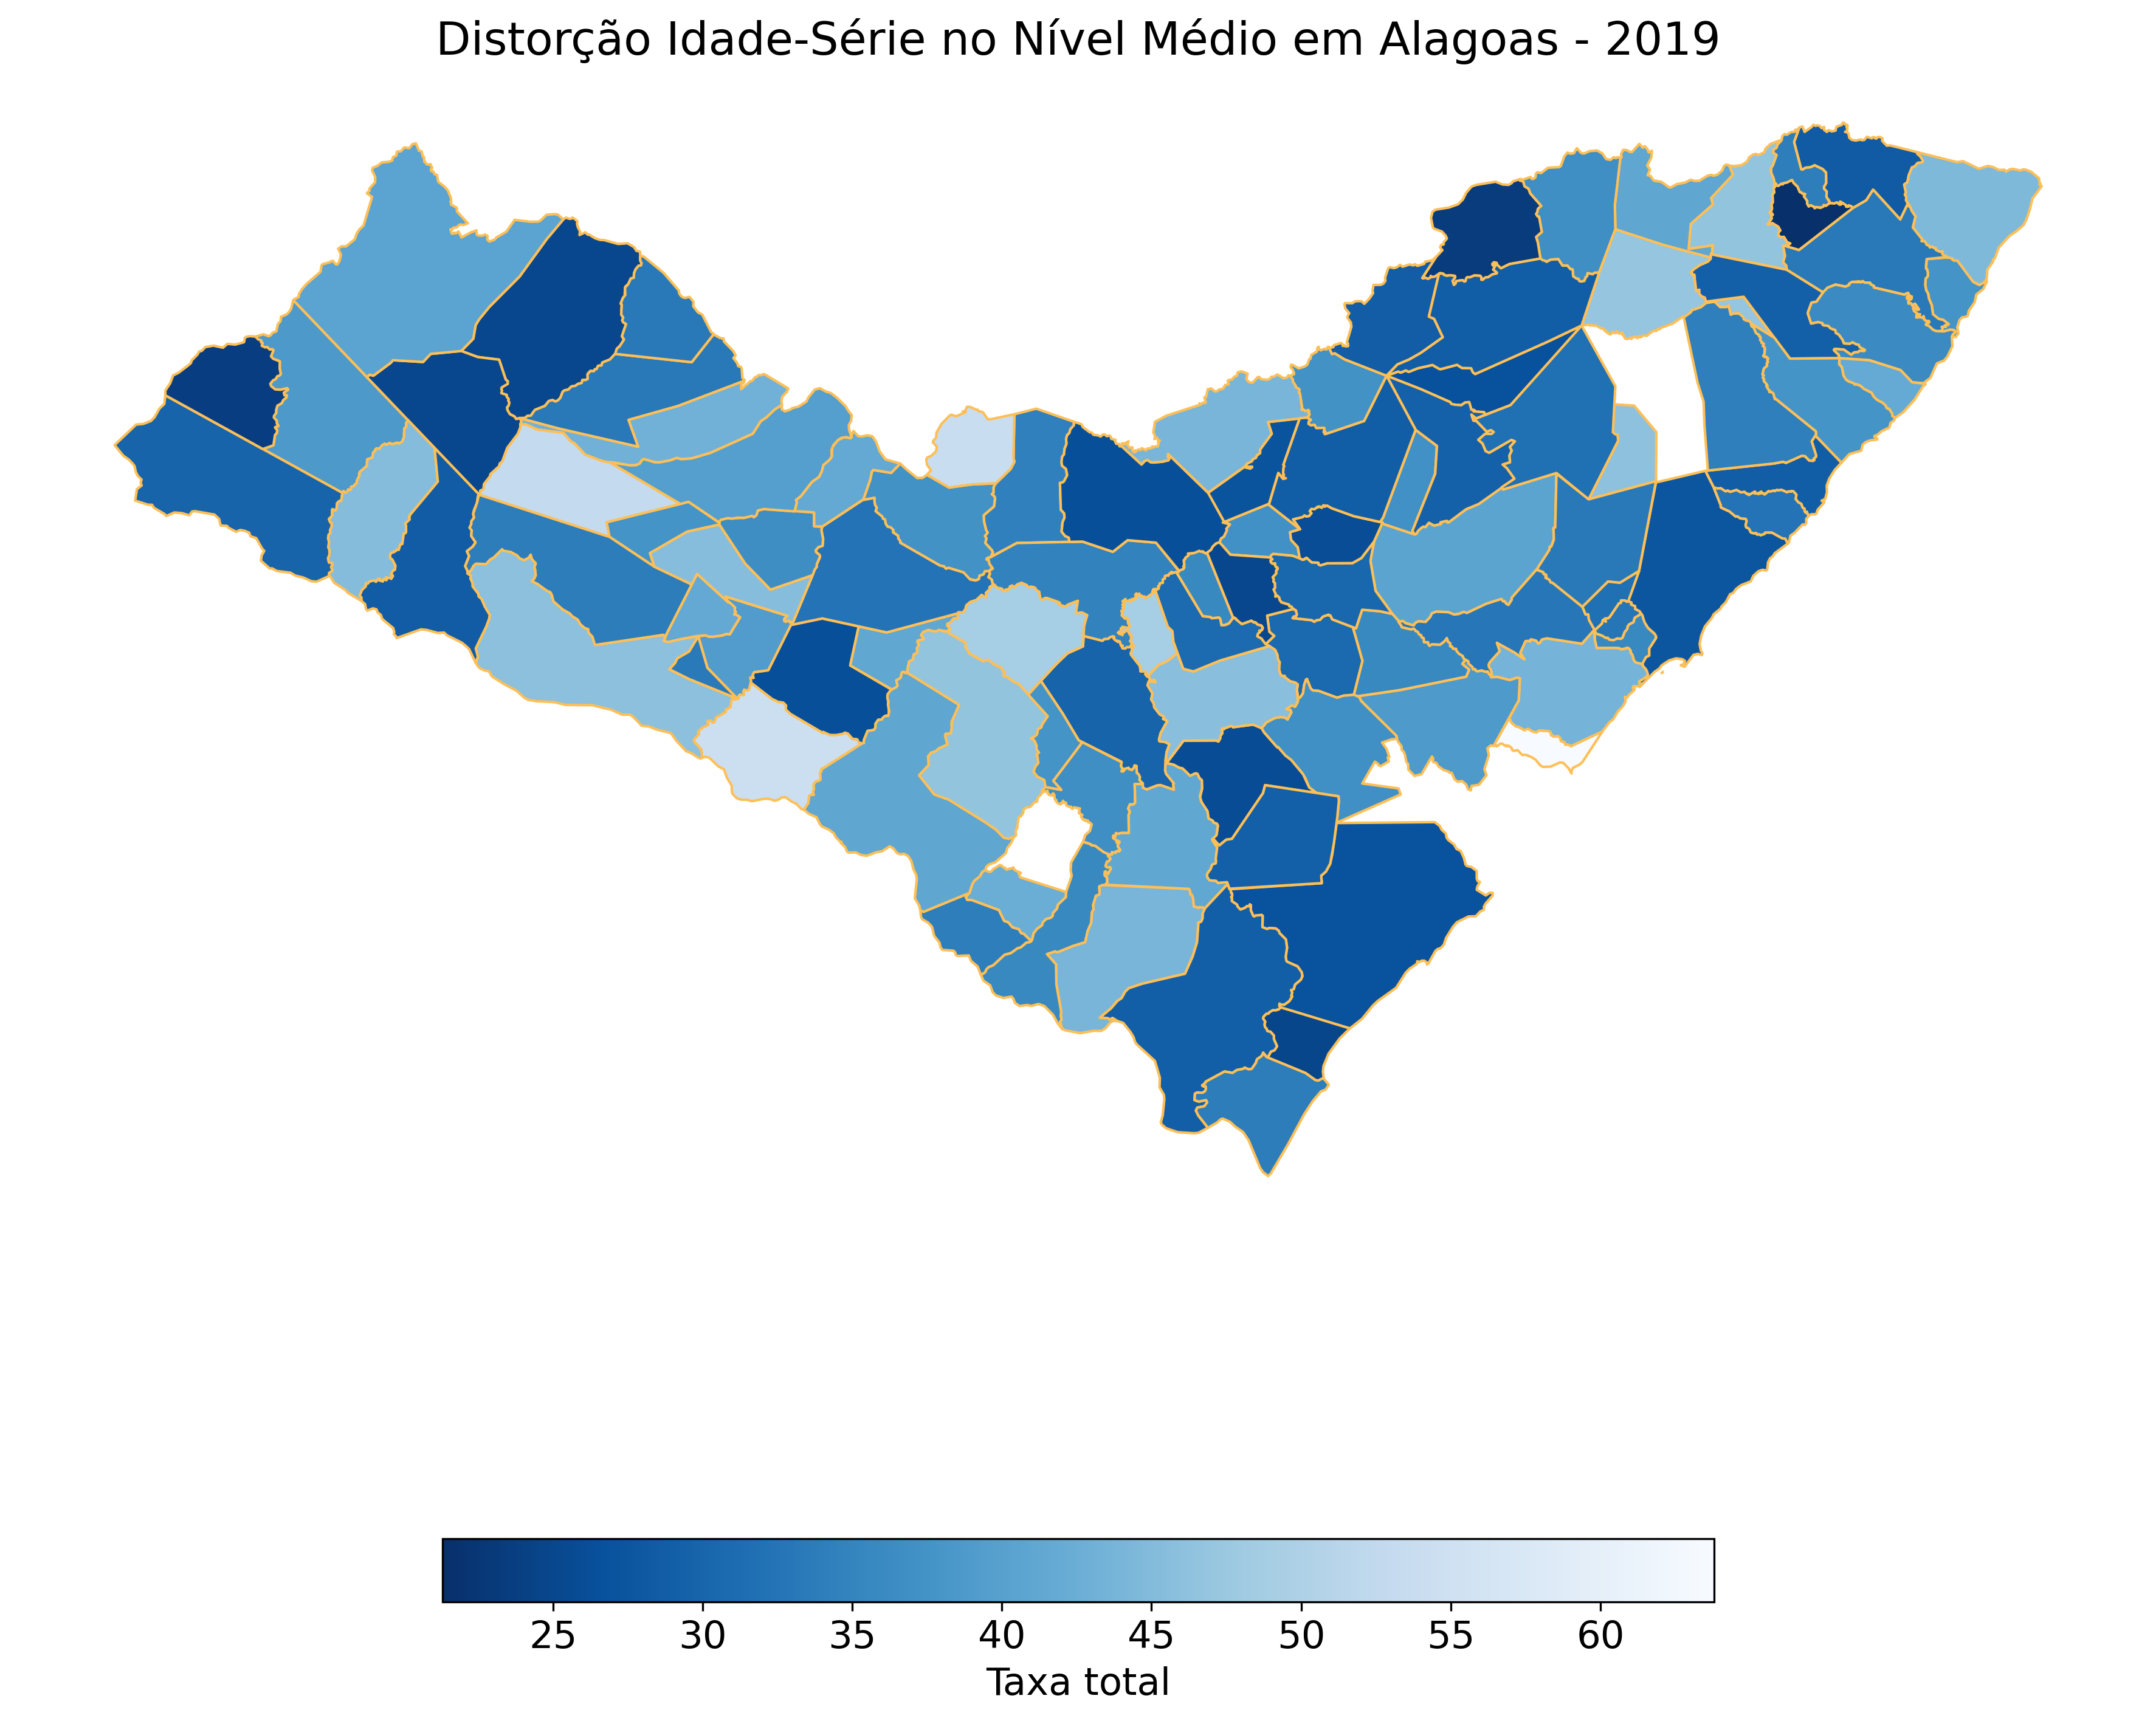

In [ ]:
matplotlib.pyplot.rcParams.update({"font.size": 15})

fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15), dpi=300)

all_muni_al_tdi_2019.plot(
    column="tdi",
    cmap="Blues_r",
    legend=True,
    legend_kwds={
        "label": "Taxa total",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    edgecolor="#FEBF57",
    ax=ax,
)

ax.set_title("Distorção Idade-Série no Nível Médio em Alagoas - 2019")
ax.axis("off")